In [ ]:
import webbrowser

webbrowser.open('https://dr7.lamost.org/catalogue')    # Download LAMOST LRS General Catalog and LAMOST MRS General Catalog CSV files

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

from astroquery.gaia import Gaia
from astroquery.simbad import Simbad

import astropy.coordinates as coord
import astropy.units as u

import pyvo as vo

import starcolorindexSpT

from pyasassn.client import SkyPatrolClient
client = SkyPatrolClient()

import warnings
warnings.filterwarnings('ignore')

import webbrowser

Welcome to ASAS-SN Skypatrol!

Current Deployment Version: 0.6.9 (28 April 2023)
Please upgrade your client if not up to date.



In [2]:
from importlib.metadata import version

import lightkurve as lk
print(version('lightkurve'))

from lightkurve import search_targetpixelfile
from lightkurve import search_lightcurve

2.4.0


In [3]:
import matplotlib
import astroquery
import pyasassn

print("pandas" + str(pd.__version__))
print("numpy"  + str(np.__version__))
print("scipy"  + str(sp.__version__))

print("matplotlib" + str(matplotlib.__version__))

print("astroquery" + str(astroquery.__version__))

print("lightkurve" + str(lk.__version__))

print("\n")
!python --version

print("\n")
!jupyter --version

pandas1.1.5
numpy1.24.2
scipy1.9.3
matplotlib3.2.2
astroquery0.4.7.dev8479
lightkurve2.4.0


Python 3.8.5


Selected Jupyter core packages...
IPython          : 8.12.0
ipykernel        : 6.19.2
ipywidgets       : 8.0.4
jupyter_client   : 8.1.0
jupyter_core     : 5.3.0
jupyter_server   : 2.5.0
jupyterlab       : not installed
nbclient         : 0.5.13
nbconvert        : 7.3.1
nbformat         : 5.7.0
notebook         : 6.5.3
qtconsole        : 5.4.2
traitlets        : 5.7.1


In [30]:
#import webbrowser

webbrowser.open('https://arxiv.org/pdf/2207.01946.pdf')

True

In [4]:
#import webbrowser

webbrowser.open('https://en.wikipedia.org/wiki/List_of_astronomy_acronyms#C')

True

In [9]:
#import webbrowser

webbrowser.open('https://www.zooniverse.org/projects/tharinduj/citizen-asas-sn/about/research')

webbrowser.open('https://drive.google.com/drive/folders/1gxcIokRsw1eyPmbPZ0-C8blfRGItSOAu')

webbrowser.open('https://asas-sn.osu.edu/variables')

webbrowser.open('https://www.zooniverse.org/projects/tharinduj/citizen-asas-sn/about/research')

webbrowser.open('https://arxiv.org/pdf/2207.01946.pdf')

webbrowser.open('https://github.com/asas-sn/skypatrol')

webbrowser.open('https://asas-sn.github.io/skypatrol/index.html')

True

In [4]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [4]:
make_canvas_flag = "Y"

hydrogen_lines_flag = "N"

In [5]:
def make_labels(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

In [6]:
def make_RVS_canvas(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Ca II 8498', xy=[8498, yRangeMin ],  rotation=-90, color='red')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin ], rotation=-90, color='red')
    plt.annotate('Pa14 8600', xy=[8600, yRangeMin - 0.3 ], rotation=-90, color='red')
    plt.annotate('Ca II 8662.1', xy=[8662, yRangeMin ],  rotation=-90, color='red')

In [7]:
# Plotter ==============================================
def make_canvas(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    plt.xticks([3839, 3889, 3970, 4101, 4340, 4472, 4861, 5175, 5270, 5411, 5755, 5895, 6302,
               6365, 6562, 6562, 6890, 7135, 7500, 7775, 8000, 8498, 8542, 8662, 9000, 9200])
    
    xLabels = (3839, 3889, 3970, 4101, 4340, 4472, 4861, 5175, 5270, 5411, 5755, 5895, 6302,
               6365, 6562, 6562, 6890, 7135, 7500, 7775, 8000, 8498, 8542, 8662, 9000, 9200)

    plt.xticks(xLabels, rotation=90)

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 0.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('CN 3839', xy=[3839,   yRangeMin + 0.6],  rotation=-90)
    plt.annotate('H-zeta 3889', xy=[3889, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-epsilon 3970', xy=[3970, yRangeMin +  0.6],  rotation=-90, color='red')
    plt.annotate('H-delta 4101', xy=[4101, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-gamma 4340', xy=[4340, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('He I 4471.7', xy=[4472, yRangeMin + .20],  rotation=-90, color='orange')
    plt.annotate('H-beta 4861', xy=[4861, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('Mg I 5175', xy=[5175, yRangeMin + .20],  rotation=-90)
    plt.annotate('Fe I 5270', xy=[5270, yRangeMin +  .20],  rotation=-90)
    plt.annotate('He II 5411', xy=[5411, yRangeMin +  .20],  rotation=-90, color='orange')
    plt.annotate('N II 5755', xy=[5755, yRangeMin +  .20],  rotation=-90)
    plt.annotate('D1 Na I 5895', xy=[5895, yRangeMin +  .20],  rotation=-90, color='blue')
    plt.annotate('OI 6302', xy=[6302, yRangeMin +  .20],  rotation=-90, color='green')
    plt.annotate('OI 6365.5', xy=[6365, yRangeMin +  .20],  rotation=-90, color='green')
    plt.annotate('H-alpha 6562', xy=[6562, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('CN 6890', xy=[6890, yRangeMin +  .20],  rotation=-90)
    plt.annotate('Ar III 7135', xy=[7135, yRangeMin +  .20],  rotation=-90)
    plt.annotate('O I 7775', xy=[7775, yRangeMin +  .20], rotation=-90, color='green')
    plt.annotate('Ca II 8498', xy=[8498, yRangeMin +  .35],  rotation=-90, color='blue')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin +  .30], rotation=-90, color='blue')
    plt.annotate('Ca II 8662.1', xy=[8662, yRangeMin +  .30],  rotation=-90, color='blue')


def Hydrogen_lines(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    plt.xticks([3835, 3889, 3970, 4101, 4340, 4861, 6000, 6562, 7000, 8000, 9000, 10000])
    
    xLabels = (3835, 3889, 3970, 4101, 4340, 4861, 6000, 6562, 7000, 8000, 9000, 10000)

    plt.xticks(xLabels, rotation=90)

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 0.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('H12 3750', xy=[3750, yRangeMin +  .50],  rotation=-90, color='red')
    plt.annotate('H11 3771', xy=[3771, yRangeMin -  .35],  rotation=-90, color='red')
    plt.annotate('H10 3798', xy=[3798, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H9 3835', xy=[3835, yRangeMin -  .10],  rotation=-90, color='red')

    plt.annotate('H8-zeta 3889', xy=[3889, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-epsilon 3970', xy=[3970, yRangeMin +  0.6],  rotation=-90, color='red')
    plt.annotate('H-delta 4101', xy=[4101, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-gamma 4340', xy=[4340, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('H-beta 4861', xy=[4861, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('H-alpha 6562', xy=[6562, yRangeMin +  .20],  rotation=-90, color='red')

In [8]:
def make_RVS_canvas1(xlabel = '', ylabel = '', fontsize = 12):     ### 8460 - 8580
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Fe I 8470', xy=[8470, yRangeMin ],  rotation=-90, color='green')
    plt.annotate('Mg I 8476', xy=[8476, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8483', xy=[8483, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ca II 8498', xy=[8498, yRangeMin ],  rotation=-90, color='red')
    plt.annotate('Ca II 8502', xy=[8502, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ce II 8514', xy=[8514, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe I 8516', xy=[8516, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ti I 8520.6', xy=[8520.6, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Zr II 8527', xy=[8527, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe I 8529', xy=[8529, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Si I 8538', xy=[8538, yRangeMin - 0.3],  rotation=-90, color='red')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ca II 8546', xy=[8546, yRangeMin - 0.3],  rotation=-90, color='red')
    plt.annotate('Cr I 8551', xy=[8551, yRangeMin  - 0.3],  rotation=-90, color='green')
    plt.annotate('Si I 8559', xy=[8559, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Ti I 8572', xy=[8572, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8574', xy=[8574, yRangeMin - 0.3],  rotation=-90, color='green')

In [9]:
def make_RVS_canvas2(xlabel = '', ylabel = '', fontsize = 12):    ### 8580 - 8700
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Fe I 8584', xy=[8584, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe II 8588', xy=[8588, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Nd II 8594', xy=[8594, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8624', xy=[8624, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('N I 8631',  xy=[8631, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Ca I 8636',  xy=[8636, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Ni I 8639',  xy=[8639, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Cr I 8645', xy=[8645, yRangeMin  - 0.3],  rotation=-90, color='green')
    plt.annotate('Ca II 8662', xy=[8662, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ca II 8666', xy=[8666, yRangeMin],  rotation=-90, color='red')
    plt.annotate('S I 8672',  xy=[8672, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Fe I 8677', xy=[8677, yRangeMin],  rotation=-90, color='green')
    plt.annotate('N I 8685',  xy=[8685, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Si I 8688', xy=[8688, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Fe I 8691', xy=[8691, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ti I 8694', xy=[8694, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('S I 8697',  xy=[8697, yRangeMin  - 0.3 ],  rotation=-90, color='red')

In [10]:
def PlotTarget4(target, i, targetstring, freqmin, freqmax):
    import matplotlib.pyplot as plt

    import astropy.units as u

    from lightkurve import search_targetpixelfile
    

    plt.rcParams.update({'figure.max_open_warning': 0})
    


    lc = lk.search_lightcurve(target)[i].download();

    #lc = lc0.remove_nans().normalize().remove_outliers()
    #lc = lc0.flatten()
    #lc = lc0.remove_outliers()
    #lc = lc0.remove_outliers(sigma=3)


    if plot_pixelfile == 'Y':
        pixelfile = search_targetpixelfile(target)[i].download()
        pixelfile.plot(frame=1);
        pixel_lc = pixelfile.to_lightcurve(aperture_mask='all')
        pixel_lc.plot()
        sText = "\nPixelfile Lightcurve Plot"
        plt.title(str(target) + " (" + str(i) + ")"  + sText);


    if plot_lightcurve  == "Y":
        #plt.figure(figsize=(13, 10))
        lc.plot()
        #lc.plot(label='Lightcurve Plot2')
        sText = "\nLightcurve Plot"
        plt.title(str(target) + " (" + str(i) + ")"  + sText);

        if plot_PDC_AP_Flux == 'Y':
            ax = lc.plot(column='pdcsap_flux', label='PDCSAP Flux', normalize=True)
            lc.plot(column='sap_flux', label='SAP Flux', normalize=True, ax=ax);
            plt.title(str(target) + " (" + str(i) + ")"  + "\nCompare the PDCSAP and the SAP flux");

        #ax = lc.plot()
        #ax.set_title("PDCSAP light curve of " + str(target));
    
    #period = np.linspace(1, 20, 10000)
    period = np.linspace(freqmin, freqmax, 10000)
    bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
    #bls = lc.normalize().to_periodogram(method='bls', period=period, frequency_factor=500);
    
    period_array = bls.period
    period_rounded = np.round(period_array, 1)
    power_array = bls.power

    # Save the highest peak as the planet candidate
    #index = np.argmax(power_array.power)
    #bls_period = period_array.period[index]


    df_dict = {
        'Period': period_rounded,
        'Power': power_array
        }
    df = pd.DataFrame(df_dict)
    df = df.sort_values(by=['Power'], ascending=False)
    df = df.drop_duplicates(subset=['Period'], keep='first')
    #print(df[0:10])


    planet_period = bls.period_at_max_power
    planet_t0 = bls.transit_time_at_max_power
    planet_dur = bls.duration_at_max_power

    if plot_period      == "Y":
        #plt.figure(figsize=(13, 10))
        #print("Period Array: " + str(period_array))
        bls.plot()
        #plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + "\n                    LightKurve Period:  " + str(planet_period));
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + "\n                    LightKurve Period:   + {0:.4f} ".format(planet_period)+ "\nlc = lk.search_lightcurve(target)[i].download()");
        #plt.axvline(bls_period, color="C1", lw=5, alpha=0.8)
        # + "\nPeriod array: " + str(period_array)  + "\nPower array: " + str(power_array)
        #print(df['Period'][0:10])


    if plot_phase_fold  == "Y":
        #plt.figure(figsize=(13, 10))
        ax = lc.fold(period=planet_period, epoch_time=planet_t0).scatter()
        ax.set_xlim(-5, 5)
        sText = "\nPhase-fold the light curve to confirm period and transit time (epoch) \ncorrespond to a transit signal."
        plt.title(str(target) + " (" + str(i) + ")"  + sText);
        plt.show();
        

    if plot_half_phase_fold == "Y":
        ax = lc.fold(period=0.5*planet_period, epoch_time=planet_t0).scatter()
        ax.set_xlim(-5, 5)
        sText1 = "\nThe above eclipses may not line up or look like the correct period of an eclipsing binary."  
        sText2 = "\nThis is common for eclipsing binaries with deep secondary eclipses, we may have found a harmonic of the period." 
        sText3 = "\nLet's plot it again with half the period."
        plt.title(str(target) + " (" + str(i) + ")"  + sText1 + sText2 + sText3)
        plt.show();

    if plot_2phase_fold == "Y":
        #plt.figure(figsize=(13, 10))
        ax = lc.fold(period=2*planet_period, epoch_time=planet_t0).scatter()
        ax.set_xlim(-5, 5)
        sText1 = "\nThe above eclipses may not line up or look like the correct period of an eclipsing binary."  
        sText2 = "\nThis is common for eclipsing binaries with deep secondary eclipses, we may have found a harmonic of the period." 
        sText3 = "\nLet's plot it again with twice the period."
        plt.title(str(target) + " (" + str(i) + ")"  + sText1 + sText2 + sText3)
        plt.show();

    if plot_3phase_fold == "Y":
        #plt.figure(figsize=(13, 10))
        ax = lc.fold(period=3*planet_period, epoch_time=planet_t0).scatter()
        ax.set_xlim(-5, 5)
        sText1 = "\nThe above eclipses may not line up or look like the correct period of an eclipsing binary."  
        sText2 = "\nThis is common for eclipsing binaries with deep secondary eclipses, we may have found a harmonic of the period." 
        sText3 = "\nLet's plot it again with three times the period."
        plt.title(str(target) + " (" + str(i) + ")"  + sText1 + sText2 + sText3)
        plt.show();

    if plot_4phase_fold == "Y":
        #plt.figure(figsize=(13, 10))
        ax = lc.fold(period=4*planet_period, epoch_time=planet_t0).scatter()
        ax.set_xlim(-5, 5)
        sText1 = "\nThe above eclipses may not line up or look like the correct period of an eclipsing binary."  
        sText2 = "\nThis is common for eclipsing binaries with deep secondary eclipses, we may have found a harmonic of the period." 
        sText3 = "\nLet's plot it again with quadruple the period."
        plt.title(str(target) + " (" + str(i) + ")"  + sText1 + sText2 + sText3)
        plt.show();
        """pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
        pg.period_at_max_power
        lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter();
        sText1 = "\nThe above eclipses may not line up or look like the correct period of an eclipsing binary."  
        sText2 = "\nThis is common for eclipsing binaries with deep secondary eclipses, we may have found a harmonic of the period." 
        sText3 = "\nLet's plot it again with quadruple the period."
        plt.title(str(target) + " (" + str(i) + ")"  + sText1 + sText2 + sText3)
        plt.show();"""

    
    if plot_periodogram == "Y":
        pg = lc.to_periodogram(oversample_factor=1)
        pg.plot()
        sText = "\nPlot the periodogram in the same way that we plot the original light curve."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring)   + sText)
        plt.show()

        pg.plot(view='period', scale='log')
        sText = "\nLet's plot it in period space, so that we can see what period the oscillation is occurring at."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        lc.fold(period=pg.period_at_max_power).scatter()
        sText = "\nLet's use the period_at_max_power to fold the light curve"
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter()
        sText = "\nIf the eclipses do not line up, try plotting it again with quadruple the period."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
        pg.period_at_max_power  
        sText ="\nLet's try to get a more precise period by increasing the number of points in our periodogram \nusing the `oversample_factor` parameter and by constraining the range of the period value:"
        #sText ="\nLet's try to get a more precise period by increasing the number of points in our periodogram \nusing the `oversample_factor` parameter."
        lc.fold(period=pg.period_at_max_power, wrap_phase=0.2).scatter()
        #lc.fold(period=pg.period_at_max_power).scatter()
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring)  + sText)
        plt.show()

    plt.figure(figsize=(13.5, 1))
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.axis('off')
    plt.close()

In [11]:
def PlotTarget4B(target, i, targetstring, freqmin, freqmax):
    import matplotlib.pyplot as plt

    import astropy.units as u
    

    plt.rcParams.update({'figure.max_open_warning': 0})
    


    lc0 = lk.search_lightcurve(target)[i].download();

    lc = lc0.remove_nans().normalize().remove_outliers()


    
    #lc = lc0.flatten()
    #lc = lc0.remove_outliers()
    #lc = lc0.remove_outliers(sigma=3)





    if plot_lightcurve  == "Y":
        #plt.figure(figsize=(13, 10))
        lc.plot()
        #lc.plot(label='Lightcurve Plot2')
        sText = "\nLightcurve Plot"
        plt.title(str(target) + " (" + str(i) + ")"  + sText);
       
    
    #period = np.linspace(1, 20, 10000)
    period = np.linspace(freqmin, freqmax, 10000)
    bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
    #bls = lc.normalize().to_periodogram(method='bls', period=period, frequency_factor=500);
    
    period_array = bls.period
    period_rounded = np.round(period_array, 1)
    power_array = bls.power

    # Save the highest peak as the planet candidate
    #index = np.argmax(power_array.power)
    #bls_period = period_array.period[index]


    df_dict = {
        'Period': period_rounded,
        'Power': power_array
        }
    df = pd.DataFrame(df_dict)
    df = df.sort_values(by=['Power'], ascending=False)
    df = df.drop_duplicates(subset=['Period'], keep='first')
    #print(df[0:10])


    planet_period = bls.period_at_max_power
    planet_t0 = bls.transit_time_at_max_power
    planet_dur = bls.duration_at_max_power

    if plot_period      == "Y":
        #plt.figure(figsize=(13, 10))
        #print("Period Array: " + str(period_array))
        bls.plot()
        #plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + "\n                    LightKurve Period:  " + str(planet_period));
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + "\n                    LightKurve Period:   + {0:.4f} ".format(planet_period) + "\nlc0.remove_nans().normalize().remove_outliers()");
        #plt.axvline(bls_period, color="C1", lw=5, alpha=0.8)
        # + "\nPeriod array: " + str(period_array)  + "\nPower array: " + str(power_array)
        #print(df['Period'][0:10])


    if plot_phase_fold  == "Y":
        #plt.figure(figsize=(13, 10))
        ax = lc.fold(period=planet_period, epoch_time=planet_t0).scatter()
        ax.set_xlim(-5, 5)
        sText = "\nPhase-fold the light curve to confirm period and transit time (epoch) \ncorrespond to a transit signal."
        plt.title(str(target) + " (" + str(i) + ")"  + sText);
        plt.show();

    if plot_4phase_fold == "Y":
        #plt.figure(figsize=(13, 10))
        pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
        pg.period_at_max_power
        lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter();
        sText1 = "\nThe above eclipses may not line up or look like the correct period of an eclipsing binary."  
        sText2 = "\nThis is common for eclipsing binaries with deep secondary eclipses, we may have found a harmonic of the period." 
        sText3 = "\nLet's plot it again with quadruple the period."
        plt.title(str(target) + " (" + str(i) + ")"  + sText1 + sText2 + sText3)
        plt.show();

    
    if plot_periodogram == "Y":
        pg = lc.to_periodogram(oversample_factor=1)
        pg.plot()
        sText = "\nPlot the periodogram in the same way that we plot the original light curve."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring)   + sText)
        plt.show()

        pg.plot(view='period', scale='log')
        sText = "\nLet's plot it in period space, so that we can see what period the oscillation is occurring at."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        lc.fold(period=pg.period_at_max_power).scatter()
        sText = "\nLet's use the period_at_max_power to fold the light curve"
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter()
        sText = "\nIf the eclipses do not line up, try plotting it again with quadruple the period."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
        pg.period_at_max_power  
        sText ="\nLet's try to get a more precise period by increasing the number of points in our periodogram \nusing the `oversample_factor` parameter and by constraining the range of the period value:"
        #sText ="\nLet's try to get a more precise period by increasing the number of points in our periodogram \nusing the `oversample_factor` parameter."
        lc.fold(period=pg.period_at_max_power, wrap_phase=0.2).scatter()
        #lc.fold(period=pg.period_at_max_power).scatter()
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring)  + sText)
        plt.show()

    plt.figure(figsize=(13.5, 1))
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.axis('off')
    plt.close()

In [12]:
def PlotTarget5(target, i, targetstring, freqmin, freqmax):

    # https://gallery.exoplanet.codes/tutorials/tess/

    import matplotlib.pyplot as plt

    import astropy.units as u

    import numpy as np
    import lightkurve as lk
    
    from astropy.io import fits
    
    plt.rcParams.update({'figure.max_open_warning': 0})
    

    lc_file = lk.search_lightcurve(target)[i].download();

    lc = lc_file.remove_nans().normalize().remove_outliers()

    #lc = lc_file

    time = lc.time.value
    flux = lc.flux
    m = lc.quality == 0
    with fits.open(lc_file.filename) as hdu:
        hdr = hdu[1].header

    texp = hdr["FRAMETIM"] * hdr["NUM_FRM"]
    texp /= 60.0 * 60.0 * 24.0

    ref_time = 0.5 * (np.min(time) + np.max(time))
    x = np.ascontiguousarray(time[m] - ref_time, dtype=np.float64)
    y = np.ascontiguousarray(1e3 * (flux[m] - 1.0), dtype=np.float64)

    """plt.plot(x, y, ".k")
    plt.xlabel("time [days]")
    plt.ylabel("relative flux [ppt]")
    _ = plt.xlim(x.min(), x.max())

    plt.close()"""


    # Transit search

    # Now, let’s use the box least squares periodogram from AstroPy 
    # (Note: you’ll need AstroPy v3.1 or more recent to use this feature) to estimate the period, phase, and depth of the transit.

    from astropy.timeseries import BoxLeastSquares

    #period_grid = np.exp(np.linspace(np.log(1), np.log(15), 50000))
    period_grid = np.linspace(freqmin, freqmax, 50000)

    bls = BoxLeastSquares(x, y)
    bls_power = bls.power(period_grid, 0.1, oversample=20)

    # Save the highest peak as the planet candidate
    index = np.argmax(bls_power.power)
    bls_period = bls_power.period[index]
    bls_t0 = bls_power.transit_time[index]
    bls_depth = bls_power.depth[index]
    transit_mask = bls.transit_mask(x, bls_period, 0.2, bls_t0)



    fig, axes = plt.subplots(2, 1, figsize=(13, 10))



    # Plot the periodogram
    ax = axes[0]
    #ax.axvline(np.log10(bls_period), color="C1", lw=5, alpha=0.8)
    ax.axvline(bls_period, color="C1", lw=5, alpha=0.8)
    #ax.plot(np.log10(bls_power.period), bls_power.power, "k")
    ax.plot(bls_power.period, bls_power.power, "k")
    ax.annotate(
        "period = {0:.4f} d".format(bls_period),
        (0, 1),
        xycoords="axes fraction",
        xytext=(5, -5),
        textcoords="offset points",
        va="top",
        ha="left",
        fontsize=12,
    )
    ax.set_ylabel("bls power")
    ax.set_yticks([])
    #ax.set_xlim(np.log10(period_grid.min()), np.log10(period_grid.max()))
    ax.set_xlim(period_grid.min(), period_grid.max())
    #ax.set_xlabel("log10(period)")
    ax.set_xlabel("Period")
    sText = "\nPlot the periodogram"
    ax.set_title(str(target) + " (" + str(i) + ")"  + sText);
    #plt.axis('off')
    #plt.show()

    # Plot the folded transit
    ax = axes[1]
    x_fold = (x - bls_t0 + 0.5 * bls_period) % bls_period - 0.5 * bls_period
    m = np.abs(x_fold) < 0.4
    ax.plot(x_fold[m], y[m], ".k")
    ax.annotate(
        "Plot the folded transit",
        (0, 1),
        xycoords="axes fraction",
        xytext=(5, -5),
        textcoords="offset points",
        va="top",
        ha="left",
        fontsize=12,
    )
    sText = "\nPlot the folded transit \n Transit Time : " + str(bls_t0)
    #ax.set_title(str(target) + " (" + str(i) + ")"  + sText);
    #plt.axis('off')

    # Overplot the phase binned light curve
    bins = np.linspace(-0.41, 0.41, 32)
    denom, _ = np.histogram(x_fold, bins)
    num, _ = np.histogram(x_fold, bins, weights=y)
    denom[num == 0] = 1.0
    ax.plot(0.5 * (bins[1:] + bins[:-1]), num / denom, color="C1")

    ax.set_xlim(-0.3, 0.3)
    ax.set_ylabel("de-trended flux [ppt]")
    _ = ax.set_xlabel("time since transit")


    plt.figure(figsize=(13.5, 1))
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.axis('off')
    plt.show()

In [13]:
def Plot_By_PseudoColor(target1, target2, target3, target4, target5, target6, target7, target8, target9, target10,
                s1, s2, s3, s4, s5, s6, s7, s8, s9, s10):
 
    sptype_len_list = [target1, target2, target3, target4, target5, target6, target7, target8, target9, target10]
    sptype_list = [str(s1), str(s2), str(s3), str(s4), str(s5), str(s6), str(s7), str(s8), str(s9), str(s10)]

    with plt.style.context('dark_background'):
    
        fig, axs = plt.subplots(1,10, figsize=(50,6))
        for df2, label, ax in zip(sptype_len_list, sptype_list, axs.reshape(-1)):
            scatter_2D(df2['bp_rp'], df2['AbsoluteMagnitude'], ax=ax, 
                    c=df2['bp_rp'], cmap='RdYlBu',)

            ax.set(xlim=(df2['bp_rp'].min(),df2['bp_rp'].max()), ylim=(15,-10))
            
            ax.set_title(' {}: {} Stars'.format(label, len(df2)), fontsize = 20)
            ax.set_xlabel('Color index $(bp_rp)$', fontsize = 18)
            ax.set_ylabel('M', fontsize = 18)
        #plt.show()

In [14]:
def Plot_By_PseudoColor5(target1, target2, target3, target4, target5, 
                s1, s2, s3, s4, s5, ):
 
    sptype_len_list = [target1, target2, target3, target4, target5]
    sptype_list = [str(s1), str(s2), str(s3), str(s4), str(s5)]

    with plt.style.context('dark_background'):
    
        fig, axs = plt.subplots(1,5, figsize=(50,6))
        for df2, label, ax in zip(sptype_len_list, sptype_list, axs.reshape(-1)):
            scatter_2D(df2['bp_rp'], df2['AbsoluteMagnitude'], ax=ax, 
                    c=df2['bp_rp'], cmap='RdYlBu',)

            ax.set(xlim=(df2['bp_rp'].min(),df2['bp_rp'].max()), ylim=(15,-10))
            
            ax.set_title(' {}: {} Stars'.format(label, len(df2)), fontsize = 20)
            ax.set_xlabel('Color index $(bp_rp)$', fontsize = 18)
            ax.set_ylabel('M', fontsize = 18)
        #plt.show()

In [15]:
def scatter_2D(x, y, fig=None, ax=None, c='k', s=0.1, *args, **kwargs):
    
    if (fig or ax) is None:
        fig, ax = plt.subplots()
    
    plot = ax.scatter(x, y, c=c, s=s, *args, **kwargs)
    
    #axes styling
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(left=True, bottom=True,
                   labelleft=True, labelbottom=True)
    #plt.show()

<img width="800" src="asas_image01.png">

In [16]:
df_lamost_LRS_stars = pd.read_csv('dr7_v2.0_LRS_catalogue.csv', delimiter='|')     # 10431197 stars

df_lamost_MRS_stars = pd.read_csv('dr7_v2.0_MRS_catalogue.csv', delimiter='|')     # 14096967 stars - No subclass field

In [17]:
df_lamost_LRS_stars.head()

,obsid,designation,obsdate,lmjd,mjd,planid,spid,fiberid,ra_obs,dec_obs,...,fibertype,tfrom,tcomment,offsets,offsets_v,ra,dec,fibermask,gaia_source_id,gaia_g_mean_mag
0,101001,J220848.54-020324.3,2011-10-24,55859,55858,F5902,1,1,332.202274,-2.056767,...,Obj,-,.,0,0.0,332.202274,-2.056767,2,2.676862e+18,16.468395
1,101002,J220953.17-020506.0,2011-10-24,55859,55858,F5902,1,2,332.471576,-2.085015,...,Obj,-,.,0,0.0,332.471576,-2.085015,0,2.676109e+18,16.623343
2,101005,J221008.50-020659.1,2011-10-24,55859,55858,F5902,1,5,332.535456,-2.116436,...,Obj,-,.,0,0.0,332.535456,-2.116436,0,2.676109e+18,17.034334
3,101007,J221003.01-015029.0,2011-10-24,55859,55858,F5902,1,7,332.512558,-1.841408,...,Obj,-,.,0,0.0,332.512558,-1.841408,8,2.676873e+18,18.120117
4,101008,J220928.49-015720.7,2011-10-24,55859,55858,F5902,1,8,332.368745,-1.955771,...,Obj,-,.,0,0.0,332.368745,-1.955771,0,2.676865e+18,16.039270


In [18]:
print('{:d} rows'.format(len(df_lamost_LRS_stars)))
print('{:.1f} MB'.format(df_lamost_LRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

10431197 rows
9781.1 MB


In [19]:
df_lamost_LRS_stars = df_lamost_LRS_stars[df_lamost_LRS_stars['gaia_source_id'].astype(str) != '-9999']

In [20]:
df_lamost_LRS_stars = df_lamost_LRS_stars[['obsid','designation','objtype','class', 'subclass','gaia_source_id']]

In [21]:
df_lamost_LRS_stars.head()

,obsid,designation,objtype,class,subclass,gaia_source_id
0,101001,J220848.54-020324.3,Star,STAR,G7,2.676862e+18
1,101002,J220953.17-020506.0,Star,STAR,K7,2.676109e+18
2,101005,J221008.50-020659.1,Star,STAR,G0,2.676109e+18
3,101007,J221003.01-015029.0,Star,STAR,dM4,2.676873e+18
4,101008,J220928.49-015720.7,Star,STAR,F9,2.676865e+18


In [22]:
print('{:d} rows'.format(len(df_lamost_LRS_stars)))
print('{:.1f} MB'.format(df_lamost_LRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

10431197 rows
2941.7 MB


In [23]:
df_lamost_MRS_stars.head()

,mobsid,obsid,designation,obsdate,lmjd,mjd,planid,spid,fiberid,lmjm,...,rv_lasp1_err,coadd,fibermask,bad_b,bad_r,gaia_source_id,gaia_g_mean_mag,moon_angle,lunardate,moon_flg
0,58891524483556038B,588915244,J010217.11+061808.0,2017-09-28,58025,58024,HIP507401,15,244,83556038.0,...,-9999.00,0,0.0,0,0,2577199768825094016,14.951456,95.2,9,0
1,58890221283556038B,588902212,J005946.46+033816.3,2017-09-28,58025,58024,HIP507401,2,212,83556038.0,...,1.15,0,0.0,0,0,2551489746698714368,11.647265,95.2,9,0
2,58891519683556038B,588915196,J010354.98+062221.3,2017-09-28,58025,58024,HIP507401,15,196,83556038.0,...,-9999.00,0,0.0,0,0,2576471926487172224,15.034384,95.2,9,0
3,58890818283556038B,588908182,J010636.29+043330.6,2017-09-28,58025,58024,HIP507401,8,182,83556038.0,...,-9999.00,0,0.0,0,0,2540020607765617664,14.136907,95.2,9,0
4,58890914083556038B,588909140,J010955.98+055445.7,2017-09-28,58025,58024,HIP507401,9,140,83556038.0,...,-9999.00,0,0.0,0,0,2576281092500224896,12.546629,95.2,9,0


In [24]:
print('{:d} rows'.format(len(df_lamost_MRS_stars)))
print('{:.1f} MB'.format(df_lamost_MRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

14096967 rows
15472.0 MB


In [25]:
df_lamost_MRS_stars = df_lamost_MRS_stars[df_lamost_MRS_stars['gaia_source_id'].astype(str) != '-9999']

In [26]:
df_lamost_MRS_stars = df_lamost_MRS_stars[['mobsid','obsid','designation','objtype','gaia_source_id']]

In [27]:
df_lamost_MRS_stars.head()

,mobsid,obsid,designation,objtype,gaia_source_id
0,58891524483556038B,588915244,J010217.11+061808.0,Star,2577199768825094016
1,58890221283556038B,588902212,J005946.46+033816.3,Star,2551489746698714368
2,58891519683556038B,588915196,J010354.98+062221.3,Star,2576471926487172224
3,58890818283556038B,588908182,J010636.29+043330.6,Star,2540020607765617664
4,58890914083556038B,588909140,J010955.98+055445.7,Star,2576281092500224896


In [28]:
print('{:d} rows'.format(len(df_lamost_MRS_stars)))
print('{:.1f} MB'.format(df_lamost_MRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

13709506 rows
3213.5 MB


In [29]:
df_lamost_LRS_stars['gaia_source_id'] = df_lamost_LRS_stars['gaia_source_id'].astype('Int64')

df_lamost_MRS_stars['gaia_source_id'] = df_lamost_MRS_stars['gaia_source_id'].astype('Int64')

In [30]:
df_lamost_LRS_stars['gaia_source_id'].head()

0    2676862492063809536
1    2676109292239283200
2    2676108501965287424
3    2676873345446200320
4    2676865000324707328
Name: gaia_source_id, dtype: Int64

In [31]:
unique_class = np.unique(df_lamost_LRS_stars['class'].astype(str))
unique_class

array(['GALAXY', 'QSO', 'STAR', 'Unknown'], dtype=object)

In [32]:
for vartype in unique_class:
    v = df_lamost_LRS_stars[df_lamost_LRS_stars['class'] == vartype]
    print(str(vartype) + "  count: "  + str(v.shape[0]))

GALAXY  count: 198272
QSO  count: 66612
STAR  count: 9846793
Unknown  count: 319520


In [33]:
print('{:d} rows'.format(len(df_lamost_LRS_stars)))
print('{:.1f} MB'.format(df_lamost_LRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

10431197 rows
2952.2 MB


In [34]:
df_lamost_LRS_stars = df_lamost_LRS_stars[df_lamost_LRS_stars['class'] == 'STAR']

In [35]:
print('{:d} rows'.format(len(df_lamost_LRS_stars)))
print('{:.1f} MB'.format(df_lamost_LRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

9846793 rows
2785.0 MB


In [36]:
# https://asas-sn.osu.edu/variables  

# Export V-Band Data -> click CSV Catalog to download CSV file 
# File name changes frequently

df_asassn_all = pd.read_csv('Stars 2023-04-28 20_14.csv')  # 687695

df_asassn_all.shape[0]

687695

In [37]:
df_asassn_all['gaia_source_id'] = df_asassn_all['edr3_source_id'].str.replace('EDR3 ','', regex=True)

In [38]:
df_asassn_all['AbsoluteMagnitude'] = df_asassn_all['phot_g_mean_mag'] + 5*np.log10(df_asassn_all['parallax']) - 10

In [39]:
df_asassn_lrs = df_asassn_all[df_asassn_all['gaia_source_id'].astype(str).isin(df_lamost_LRS_stars['gaia_source_id'].astype(str))]
df_asassn_lrs.shape[0]

29785

In [40]:
df_asassn_lrs_mrs = df_asassn_lrs[df_asassn_lrs['gaia_source_id'].astype(str).isin(df_lamost_MRS_stars['gaia_source_id'].astype(str))]
df_asassn_lrs_mrs.shape[0]

3725

In [41]:
#
# Select an asassn_variables target
#

#df_asassn_variables = df_asassn_all        # 687695 variables
df_asassn_variables = df_asassn_lrs        #  29785 variables
#df_asassn_variables = df_asassn_lrs_mrs    #   3725 variables

In [42]:
unique_variable_type = sp.unique(df_asassn_variables['variable_type'])

In [43]:
for vartype in unique_variable_type:
    v = df_asassn_variables[df_asassn_variables['variable_type'] == vartype]
    print(str(vartype) + "  count: "  + str(v.shape[0]))

AM  count: 6
AM+E  count: 2
CV  count: 11
CV:  count: 1
CWA  count: 15
CWB  count: 22
DCEP  count: 51
DCEPS  count: 18
DQ  count: 6
DQ:  count: 1
DSCT  count: 444
DSCT:  count: 15
EA  count: 3521
EB  count: 2017
ELL  count: 9
EW  count: 6179
GCAS  count: 37
GCAS:  count: 41
HADS  count: 245
HB  count: 53
L  count: 1947
LSP  count: 44
M  count: 209
PPN  count: 1
R  count: 4
RCB  count: 1
ROT  count: 2776
ROT:  count: 3378
RRAB  count: 1660
RRC  count: 653
RRD  count: 6
RVA  count: 4
SR  count: 3787
SRD  count: 11
SXPHE  count: 8
UG  count: 13
UGER  count: 2
UGSS  count: 7
UGSU  count: 14
UGSU+E  count: 3
UGWZ  count: 2
UGZ  count: 2
UV  count: 268
UV:  count: 3
V1093HER  count: 3
V361HYA  count: 4
VAR  count: 2029
YSO  count: 241
ZAND  count: 2
ZZ  count: 1
ZZA  count: 5
ZZB  count: 2
ZZO  count: 1


In [44]:
df_AM = df_asassn_variables[df_asassn_variables['variable_type'] == 'AM']
df_AM2 = df_asassn_variables[df_asassn_variables['variable_type'] == 'AM:']

df_AM_E = df_asassn_variables[df_asassn_variables['variable_type'] == 'AM+E']

df_DYPer = df_asassn_variables[df_asassn_variables['variable_type'] == 'DYPer']

df_HMXB = df_asassn_variables[df_asassn_variables['variable_type'] == 'HMXB']

df_LMXB = df_asassn_variables[df_asassn_variables['variable_type'] == 'LMXB']

df_UGER = df_asassn_variables[df_asassn_variables['variable_type'] == 'UGER']

df_UGSU_E = df_asassn_variables[df_asassn_variables['variable_type'] == 'UGSU+E']

df_UGWZ = df_asassn_variables[df_asassn_variables['variable_type'] == 'UGWZ']

df_UGZ = df_asassn_variables[df_asassn_variables['variable_type'] == 'UGZ']

df_V838MON  = df_asassn_variables[df_asassn_variables['variable_type'] == 'V838MON']



df_CV = df_asassn_variables[df_asassn_variables['variable_type'] == 'CV']
df_CV2 = df_asassn_variables[df_asassn_variables['variable_type'] == 'CV:']

df_CV_E = df_asassn_variables[df_asassn_variables['variable_type'] == 'CV+E']

df_DQ = df_asassn_variables[df_asassn_variables['variable_type'] == 'DQ']
df_DQ2 = df_asassn_variables[df_asassn_variables['variable_type'] == 'DQ:']

df_GCAS = df_asassn_variables[df_asassn_variables['variable_type'] == 'GCAS']
df_GCAS2 = df_asassn_variables[df_asassn_variables['variable_type'] == 'GCAS:']

df_HB = df_asassn_variables[df_asassn_variables['variable_type'] == 'HB']

df_LSP = df_asassn_variables[df_asassn_variables['variable_type'] == 'LSP']

df_PPN = df_asassn_variables[df_asassn_variables['variable_type'] == 'PPN']

df_PVTELI = df_asassn_variables[df_asassn_variables['variable_type'] == 'PVTELI']

df_R = df_asassn_variables[df_asassn_variables['variable_type'] == 'R']

df_RCB = df_asassn_variables[df_asassn_variables['variable_type'] == 'RCB']
df_RCB2 = df_asassn_variables[df_asassn_variables['variable_type'] == 'RCB:']

df_RRAB = df_asassn_variables[df_asassn_variables['variable_type'] == 'RRAB']

df_SDOR = df_asassn_variables[df_asassn_variables['variable_type'] == 'SDOR']
df_SDOR2 = df_asassn_variables[df_asassn_variables['variable_type'] == 'SDOR:']

df_SRD = df_asassn_variables[df_asassn_variables['variable_type'] == 'SRD']

df_SXARI = df_asassn_variables[df_asassn_variables['variable_type'] == 'SXARI']
df_SXARI2 = df_asassn_variables[df_asassn_variables['variable_type'] == 'SXARI:']

df_SXPHE = df_asassn_variables[df_asassn_variables['variable_type'] == 'SXPHE']

df_UG = df_asassn_variables[df_asassn_variables['variable_type'] == 'UG']

df_UGSS = df_asassn_variables[df_asassn_variables['variable_type'] == 'UGSS']
df_UGSU = df_asassn_variables[df_asassn_variables['variable_type'] == 'UGSU']
df_UGSU_E = df_asassn_variables[df_asassn_variables['variable_type'] == 'UGSU+E']

df_UV = df_asassn_variables[df_asassn_variables['variable_type'] == 'UV']
df_UV2 = df_asassn_variables[df_asassn_variables['variable_type'] == 'UV:']

df_V361HYA = df_asassn_variables[df_asassn_variables['variable_type'] == 'V361HYA']

df_V1093HER = df_asassn_variables[df_asassn_variables['variable_type'] == 'V1093HER']

df_WR = df_asassn_variables[df_asassn_variables['variable_type'] == 'WR']

df_ZAND = df_asassn_variables[df_asassn_variables['variable_type'] == 'ZAND']

df_ZZ = df_asassn_variables[df_asassn_variables['variable_type'] == 'ZZ']
df_ZZA = df_asassn_variables[df_asassn_variables['variable_type'] == 'ZZA']
df_ZZB = df_asassn_variables[df_asassn_variables['variable_type'] == 'ZZB']
df_ZZLep = df_asassn_variables[df_asassn_variables['variable_type'] == 'ZZLep']
df_ZZO = df_asassn_variables[df_asassn_variables['variable_type'] == 'ZZO']


In [45]:
df_CWA = df_asassn_variables[df_asassn_variables['variable_type'] == 'CWA']
df_CWB = df_asassn_variables[df_asassn_variables['variable_type'] == 'CWB']
df_DCEP = df_asassn_variables[df_asassn_variables['variable_type'] == 'DCEP']
df_DCEPS = df_asassn_variables[df_asassn_variables['variable_type'] == 'DCEPS']
df_DSCT = df_asassn_variables[df_asassn_variables['variable_type'] == 'DSCT']
df_DSCT2 = df_asassn_variables[df_asassn_variables['variable_type'] == 'DSCT:']
df_EA = df_asassn_variables[df_asassn_variables['variable_type'] == 'EA']
df_EB = df_asassn_variables[df_asassn_variables['variable_type'] == 'EB']
df_ELL = df_asassn_variables[df_asassn_variables['variable_type'] == 'ELL']
df_EW = df_asassn_variables[df_asassn_variables['variable_type'] == 'EW']
df_HADS = df_asassn_variables[df_asassn_variables['variable_type'] == 'HADS']
df_L = df_asassn_variables[df_asassn_variables['variable_type'] == 'L']
df_M = df_asassn_variables[df_asassn_variables['variable_type'] == 'M']
df_ROT = df_asassn_variables[df_asassn_variables['variable_type'] == 'ROT']
df_ROT2 = df_asassn_variables[df_asassn_variables['variable_type'] == 'ROT:']
df_RRAB = df_asassn_variables[df_asassn_variables['variable_type'] == 'RRAB']
df_RRAB2 = df_asassn_variables[df_asassn_variables['variable_type'] == 'RRAB:']
df_RRC = df_asassn_variables[df_asassn_variables['variable_type'] == 'RRC']
df_RRD = df_asassn_variables[df_asassn_variables['variable_type'] == 'RRD']
df_RVA = df_asassn_variables[df_asassn_variables['variable_type'] == 'RVA']
df_SR = df_asassn_variables[df_asassn_variables['variable_type'] == 'SR']
df_VAR = df_asassn_variables[df_asassn_variables['variable_type'] == 'VAR']
df_YSO = df_asassn_variables[df_asassn_variables['variable_type'] == 'YSO']


In [46]:
#df_asassn_variables.columns.tolist()

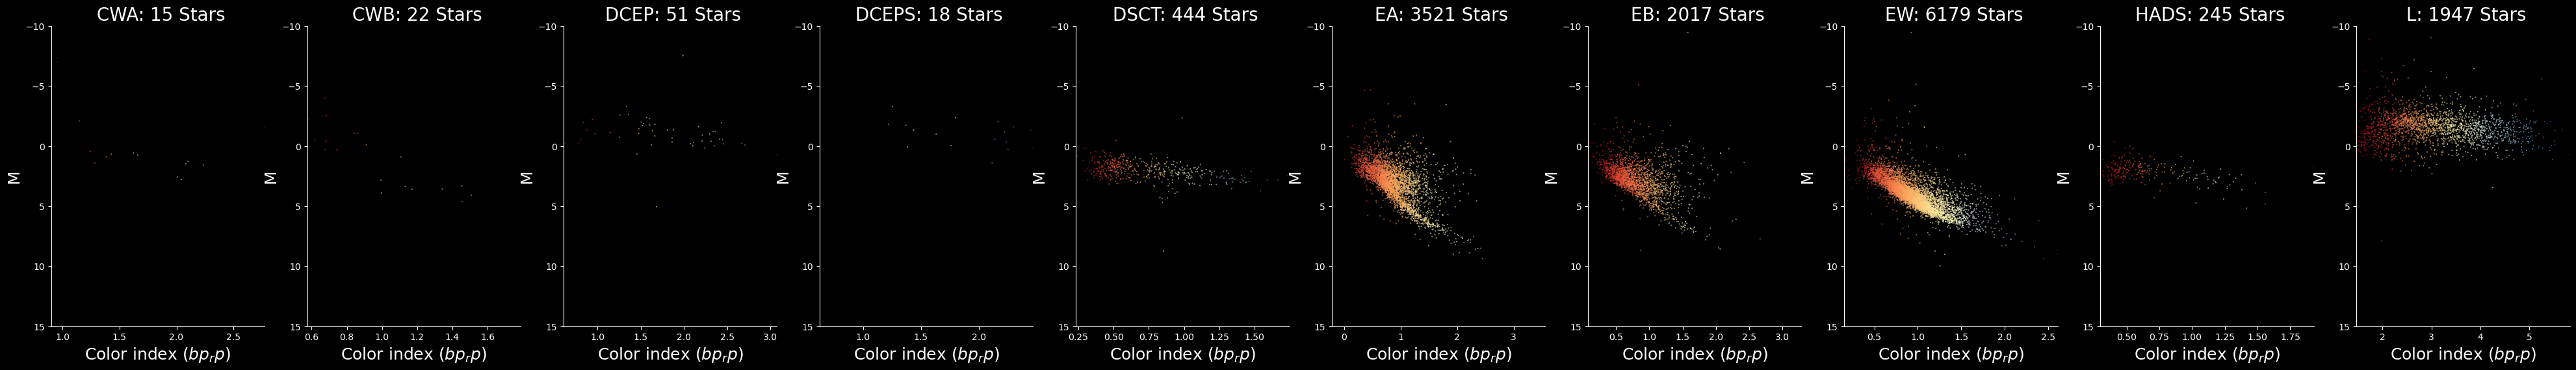

In [47]:
t1 =(df_CWA, df_CWB, df_DCEP, df_DCEPS, df_DSCT, df_EA, df_EB, df_EW, df_HADS, df_L,
         'CWA', 'CWB', 'DCEP', 'DCEPS', 'DSCT', 'EA', 'EB', 'EW', 'HADS', 'L')

Plot_By_PseudoColor(*t1)

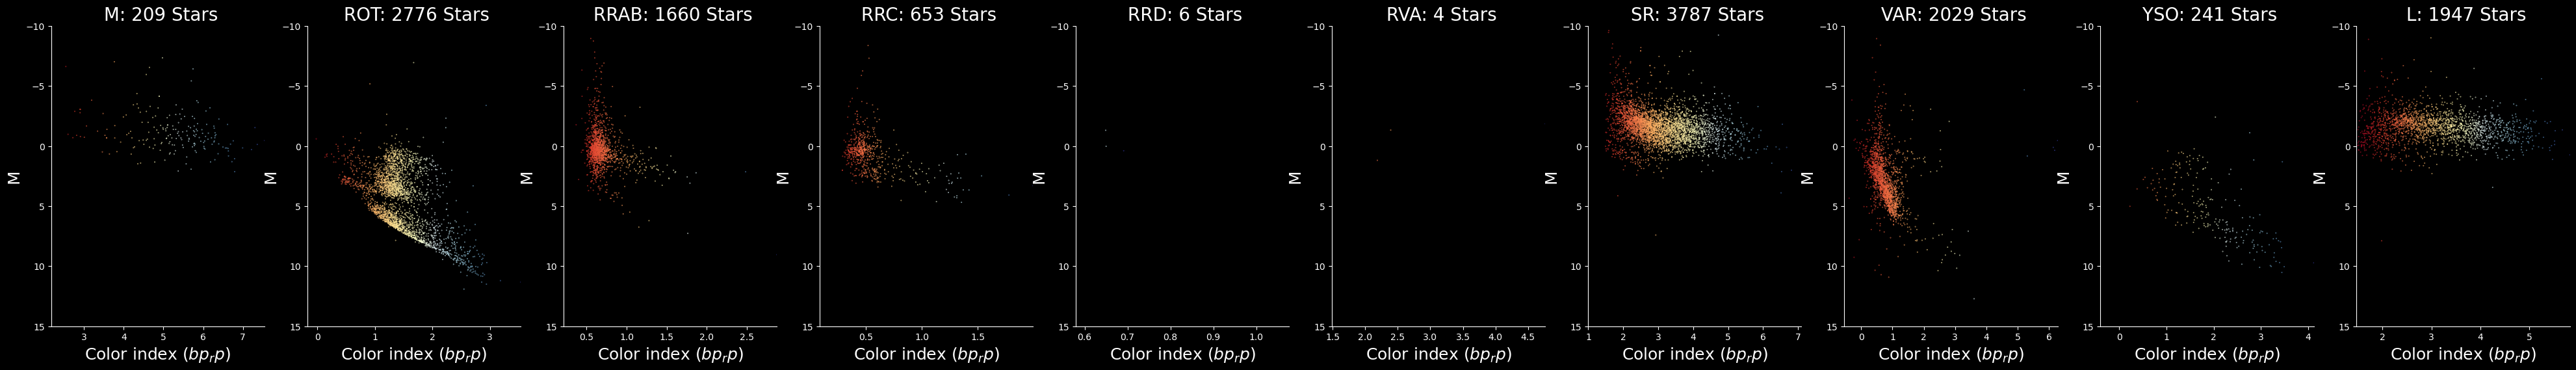

In [48]:
t2 =(df_M, df_ROT, df_RRAB, df_RRC, df_RRD, df_RVA, df_SR, df_VAR, df_YSO, df_L,
         'M', 'ROT', 'RRAB', 'RRC', 'RRD', 'RVA', 'SR', 'VAR', 'YSO', 'L')

Plot_By_PseudoColor(*t2)

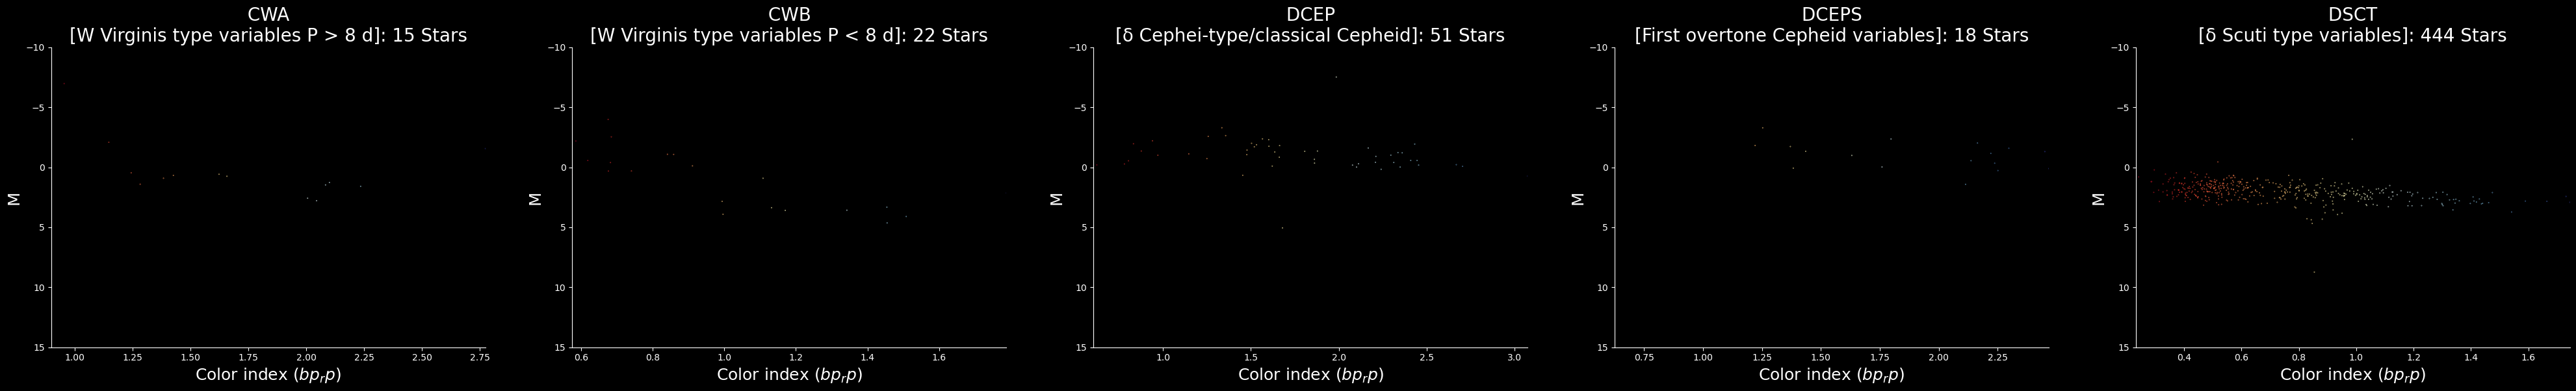

In [49]:
t3 =(df_CWA, df_CWB, df_DCEP, df_DCEPS, df_DSCT, 
         'CWA \n[W Virginis type variables P > 8 d]', 'CWB \n[W Virginis type variables P < 8 d]', 'DCEP \n[δ Cephei-type/classical Cepheid]', 'DCEPS \n[First overtone Cepheid variables]', 'DSCT \n[δ Scuti type variables]')

Plot_By_PseudoColor5(*t3)

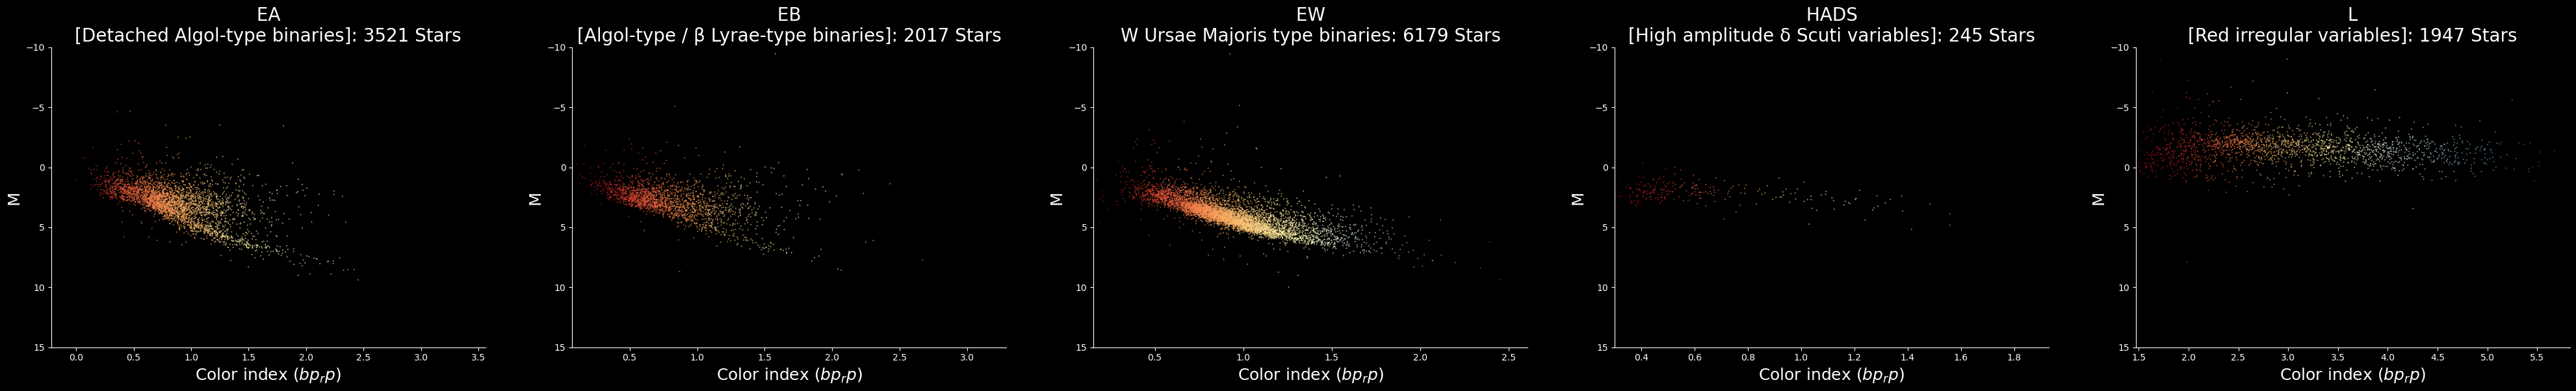

In [50]:
t4 =(df_EA, df_EB, df_EW, df_HADS, df_L,
         'EA \n[Detached Algol-type binaries]', 'EB \n[Algol-type / β Lyrae-type binaries]', 'EW \nW Ursae Majoris type binaries', 'HADS \n[High amplitude δ Scuti variables]', 'L \n[Red irregular variables]')

Plot_By_PseudoColor5(*t4)

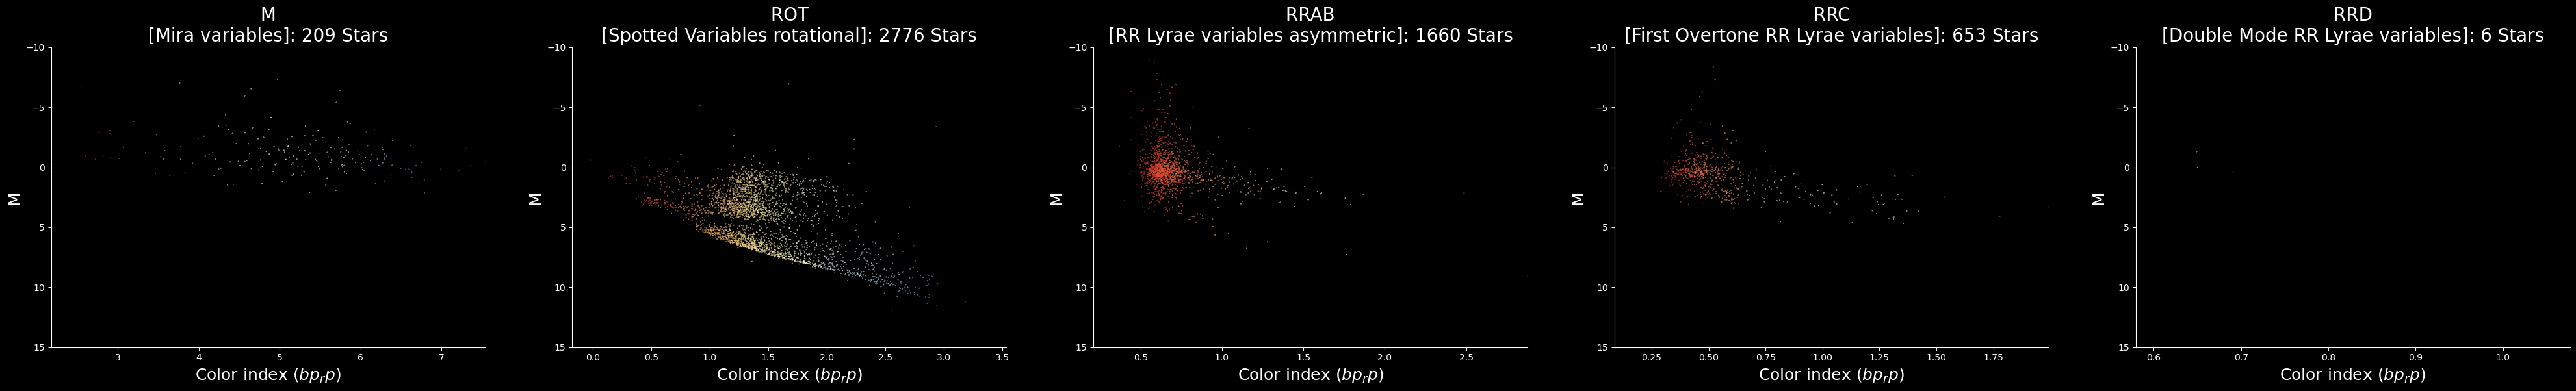

In [51]:
t5 =(df_M, df_ROT, df_RRAB, df_RRC, df_RRD, 
         'M \n[Mira variables]', 'ROT \n[Spotted Variables rotational]', 'RRAB \n[RR Lyrae variables asymmetric]', 'RRC \n[First Overtone RR Lyrae variables]', 'RRD \n[Double Mode RR Lyrae variables]')

Plot_By_PseudoColor5(*t5)

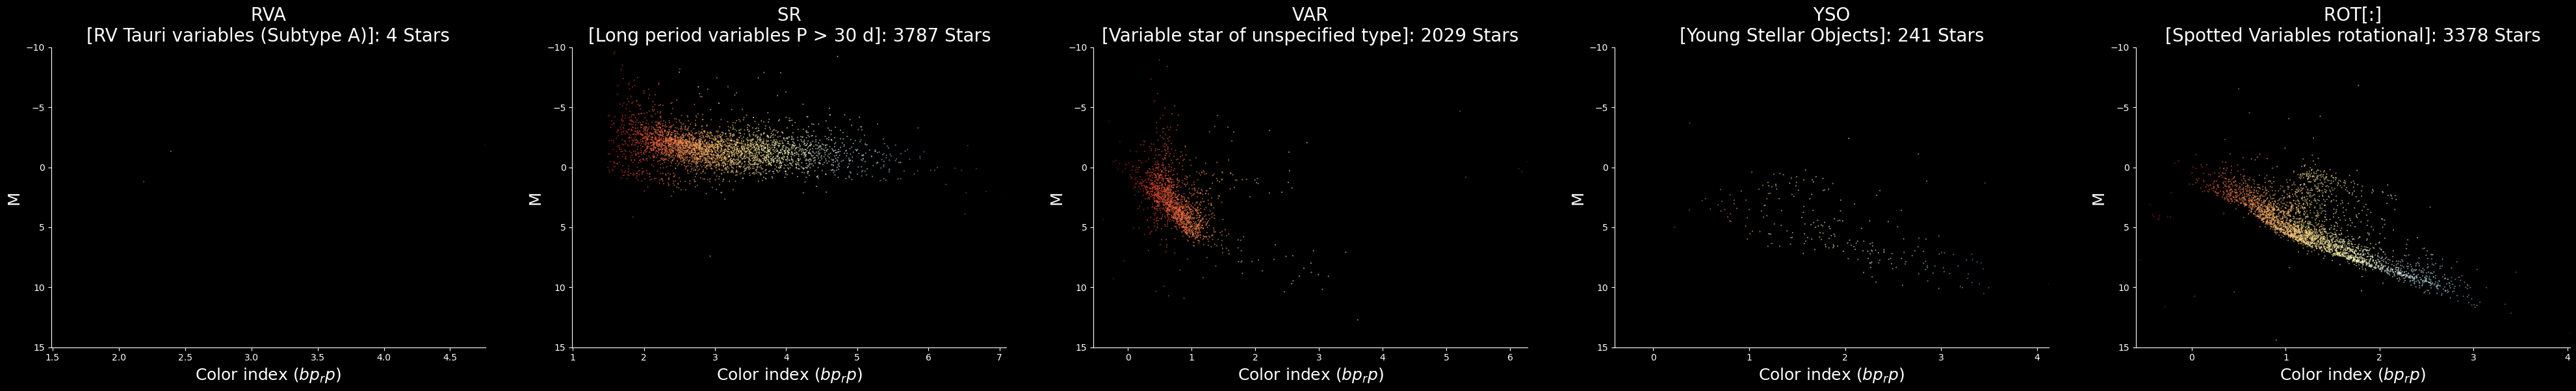

In [52]:
t6 =(df_RVA, df_SR, df_VAR, df_YSO, df_ROT2,
         'RVA \n[RV Tauri variables (Subtype A)]', 'SR \n[Long period variables P > 30 d]', 'VAR \n[Variable star of unspecified type]', 'YSO \n[Young Stellar Objects]', 'ROT[:] \n[Spotted Variables rotational]')

Plot_By_PseudoColor5(*t6)

In [ ]:
#webbrowser.open(https://asas-sn.osu.edu/atlas)

## Intrinsic Pulsation

In [72]:
""" RR Lyrae """;

#import webbrowser

#dfx = df_RRAB         # RRAB  count: 33165
#ASASSN_Variable_Type = 'RRAB: [Fundamental Mode RR Lyrae class,with asymmetric light curves \nand periods between 0.3 and 1 day]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/RRAB')

#dfx = df_RRAB2        # RRAB:  count: 49
#ASASSN_Variable_Type = 'RRAB[:] : [Fundamental Mode RR Lyrae class,with asymmetric light curves and periods between 0.3 and 1 day]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/RRAB')

#dfx = df_RRC          # RRC  count: 11249
#ASASSN_Variable_Type = 'RRC: [First Overtone RR Lyrae variables. \nThey have symmetric and sinusoidal light curves and shorter periods than RRAB stars. ]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/RRC')

#dfx = df_RRD          # RRD  count: 597
#ASASSN_Variable_Type = 'RRD: [Double Mode RR Lyrae variables. \nThey are double mode pulsators, which occupy a well defined region at GBP − GRP ∼ 0.5 mag]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/RRD')


""" Cepheids """;

#dfx = df_DCEP         # DCEP  count: 1621
#ASASSN_Variable_Type = 'DCEP: [Fundamental Mode Classical Cepheids: δ Cepheids or classical Cepheids,\ntend to be brighter than the Type II Cepheids]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/DCEP')

#dfx = df_DCEPS        # DCEPS  count: 583
#ASASSN_Variable_Type = 'DCEPS: [First Overtone Cepheid variables]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/DCEPS')

#dfx = df_CWA          # CWA  count: 640
#ASASSN_Variable_Type = 'CWA: [W Virginis type variables with P > 8 d]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/CWA')

#dfx = df_CWB          # CWB  count: 736
#ASASSN_Variable_Type = 'CWB: [W Virginis type variables with P < 8 d (BL Herculis variables)]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/CWB')

#dfx = df_RVA          # RVA  count: 152
#ASASSN_Variable_Type = 'RVA: [RV Tauri variables (Subtype A). \nRV Tauri variables are radially pulsating supergiants that change their spectral type along with their magnitude. \nTheir spectral type span from F–G class to K–M, depending on their phase. \nTheir periods are longer than 30 days, with typical values between 40–50 days.]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/RVA')


"""  LPV """;

#dfx = df_M            # M  count: 10329 - Mira Variables
#ASASSN_Variable_Type = 'M: [M (or Mira, o Ceti) variables are late type stars with periods between 80 and 1000 days.]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/M')

#dfx = df_SR           # SR  count: 204932 - Semiregular and Irregular Variables
#ASASSN_Variable_Type = 'SR: [SR: Semi-regular variables are giants or supergiants of late type with no strict periodicity. Long period variables P > 30 d]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/SR')


"""   Semiregular and Irregular Variables """;

#dfx = df_GCAS         # GCAS  count: 2021
#SASSN_Variable_Type = 'GCAS: [Gamma CASsiopeiae, a class of eruptive variable stars. Rapidly rotating early type stars. GCAS variables to be eruptive irregular variables of early spectral types (O9-A0 III-Ve) with mass outflow from their equatorial zones  ]'

#dfx = df_L            # L  count: 84019
#ASASSN_Variable_Type = 'L: [Red irregular variables]'

dfx = df_SRD          # SRD  count: 229
ASASSN_Variable_Type = 'SRD : [SRD: They are giants and supergiants of types earlier than SRA, SRB, and SRC, with variability periods from 40 to 1100 days.]'

#dfx = df_YSO          # YSO  count: 10147
#ASASSN_Variable_Type = 'YSO: [Young Stellar Objects]'


""" δ Scuti """;

#dfx = df_DSCT         # DSCT  count: 4584
#ASASSN_Variable_Type = 'DSCT: [Low Amplitude δ Scuti variables are pulsating variables similar to δ Cepheids. Periods (from 0.01 to 0.2 days). Their spectral type is between A0 and F5. Usually, lie on the instability strip]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/DSCT')

#dfx = df_DSCT2        # DSCT:  count: 430
#ASASSN_Variable_Type = 'DSCT[:] : [Low Amplitude δ Scuti variables are pulsating variables similar to δ Cepheids. Periods (from 0.01 to 0.2 days). Their spectral type is between A0 and F5. Usually, lie on the instability strip]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/DSCT')


#dfx = df_HADS         # HADS  count: 4428
#ASASSN_Variable_Type = 'HADS: [High amplitude δ Scuti type variables]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/HADS')

## Extrinsic Eclipsing Binaries

In [73]:
#import webbrowser

#webbrowser.open('https://asas-sn.osu.edu/binaries')

#dfx = df_EA           # EA  count: 50095
#ASASSN_Variable_Type = 'EA: [Detached Algol-type binaries. \nEA Algol (β Persei) type systems may not have a secondary minimum.]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/EA')

#dfx = df_EB           # EB  count: 25932
#ASASSN_Variable_Type = 'EB: [Algol-type or β Lyrae-type binaries. \nEB (β-Lyrae) type systems possess light curves that transition smoothly between from the eclipse \nto the out-of-eclipse phase, but have minima of significantly different depths.\nThe majority of such eclipsing binaries have periods larger than half a day. ]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/EB')

#dfx = df_EW           # EW  count: 78503
#ASASSN_Variable_Type = 'EW: [W Ursae Majoris type binaries. \nEW (W UMa) type systems have light curves with minima of similar depths and transition smoothly from the eclipse \nto the out-of-eclipse phase.\nComposed of two stars of similar spectral type between A and K with most of them being F or G. \nThey have short periods, typically between 0.25 and 1 day.]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/EW')



#webbrowser.open('https://arxiv.org/pdf/2205.05687.pdf') # The Value-Added Catalog of ASAS-SN Eclipsing Binaries: Parameters of Thirty Thousand Detached Systems

#webbrowser.open('https://arxiv.org/pdf/2210.06486.pdf' # The Value-Added Catalog of ASAS-SN Eclipsing Binaries II: Properties of Extra-Physics Systems

#webbrowser.open('https://arxiv.org/pdf/2212.02509.pdf' # The Value-Added Catalog of ASAS-SN Eclipsing Binaries III: Masses and Radii of Gaia Spectroscopic Binaries

#webbrowser.open('https://arxiv.org/pdf/2205.02239.pdf' # The ASAS-SN Catalog of Variable Stars X: Discovery of 116,000 New Variable Stars Using g-band Photometry



## Extrinsic Rotation

In [74]:
#import webbrowser

#dfx = df_ROT          # ROT  count: 37012
#ASASSN_Variable_Type = 'ROT: [Spotted Variables with rotational modulation. Light curves showing evidence of rotational modulation were classified as a generic rotational variable (ROT).]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/ROT')

#dfx = df_ROT2         # ROT:  count: 55723
#ASASSN_Variable_Type = 'ROT[:] : [Spotted Variables with rotational modulation]'
#webbrowser.open('https://asas-sn.osu.edu/atlas/ROT')


## Sub-dwarfs

In [75]:
#dfx = df_V361HYA      # V361HYA  count: 50
#ASASSN_Variable_Type = 'V361HYA: [Concentrated in the extreme horizontal branch. V361 Hya stars) can be redder than the main clump,\nbut they follow the blue horizontal branch (BHB). Most of V361 Hya stars are hotter (with effective temperatures \nin 28000–35000 K) than V1093 Her (23000–30000K), so the two populations are not distinct and overlap ]'

#dfx = df_V1093HER     # V1093HER count: 9
#ASASSN_Variable_Type = 'V1093HER: [Concentrated in the extreme horizontal branch. They follow the blue horizontal branch (BHB). \nMost of V361 Hya stars are hotter (with effective temperatures in 28000–35000 K) than V1093 Her (23000–30000K), \nso the two populations are not distinct and overlap ]'


In [76]:

#dfx = df_CV           # CV  count: 142
#ASASSN_Variable_Type = 'CV: [cataclysmic variables - novae and dwarf novae in main sequence, white dwarf ]'

#dfx = df_CV2          # CV:  count: 25
#ASASSN_Variable_Type = 'CV[:] : [cataclysmic variables - novae and dwarf novae in main sequence, white dwarf ]'

#dfx = df_CV_E         # CV+E  count: 6  No XP Spectra
#ASASSN_Variable_Type = 'CV+E: [cataclysmic variables - novae and dwarf novae in main sequence, white dwarf ]'

#dfx = df_DQ           # DQ  count: 45
#ASASSN_Variable_Type = 'DQ: [DQ white dwarfs variables with C and H rich atmospheres.]'

#dfx = df_DQ2          # DQ:  count: 9
#ASASSN_Variable_Type = 'DQ[:] [DQ white dwarfs variables with C and H rich atmospheres.]'

#dfx = df_ELL          # ELL  count: 70
#ASASSN_Variable_Type = 'ELL : [ELL: Ellipsoidal variables are close binaries whose light curves do not contain an eclipse \nbut their variability is due to the distortion of their shape from the mutual gravitational fields, \nthus the observed light varies because of varying projected surface towards the observer.]'

#dfx = df_GCAS2        # GCAS:  count: 1778
#ASASSN_Variable_Type = 'GCAS[:] : [Gamma CASsiopeiae, a class of eruptive variable stars ]'

#dfx = df_HB            # HB  count: 143
#ASASSN_Variable_Type = 'HB: [HB: Heartbeat variables are binary star systems with eccentric orbits that cause \nboth variations of stellar shapes and vibrations induced by such changes.]'

#dfx = df_LSP          # LSP  count: 185
#ASASSN_Variable_Type = 'LSP : [LSP: Long secondary period variables are luminous red giants stars which have secondary period an order of magnitude longer than their primary. Their periods range from 200 to 1500 days.]'

#dfx = df_PPN          # PPN  count: 16
#ASASSN_Variable_Type = 'PPN : [PPN: Protoplanetary nebulae with yellow supergiant post-AGB stars, \nexhibiting variability that resembles the SRD variables.]'

#dfx = df_PVTELI        # PVTELI  count: 11
#ASASSN_Variable_Type = 'PVTELI: [PVTEL: PV Telescopii are supergiants of several spectral types with hydrogen deficiency. They are divided into 3 sub-classes of different period ranges, from 0.5 to 100 days]'

#dfx = df_R            # R  count: 40
#ASASSN_Variable_Type = 'R: [R: close binaries that exhibit strong reflection in their light curves \n(re-radiation of light of the hotter star from the surface of the cooler one). \nMost of these stars fall in the region between the main sequence and the white dwarfs; \nsome are found in the extreme horizontal branch too.]'

#dfx = df_RCB          # RCB  count: 93
#ASASSN_Variable_Type = 'RCB: [RCoronae Borealis stars, diverse spectral types, post- AGB stars]'

#dfx = df_RCB2         # RCB:  count: 26
#ASASSN_Variable_Type = 'RCB[:] : [RCoronae Borealis stars, diverse spectral types, post- AGB stars]'

#dfx = df_SDOR         # SDOR  count: 30
#ASASSN_Variable_Type = 'SDOR : [S Doradus stars (or Luminous Blue Variables) are evolved stars characterised by \nlarge amplitude variations of Bpec to Fpec spectral type ]'

#dfx = df_SDOR2        # SDOR:  count: 14
#ASASSN_Variable_Type = 'SDOR[:] : [S Doradus stars (or Luminous Blue Variables) are evolved stars characterised by \nlarge amplitude variations of Bpec to Fpec spectral type ]'

#dfx = df_SXARI        # SXARI  count: 27
#ASASSN_Variable_Type = 'SXARI: [SXARI: SX Arietis are B-type chemical peculiar stars with strong magnetic fields and periods of about 1 day.]'

#dfx = df_SXARI2       # SXARI:  count: 9
#ASASSN_Variable_Type = 'SXARI[:] : [SXARI: SX Arietis are B-type chemical peculiar stars with strong magnetic fields and periods of about 1 day.]'

#dfx = df_SXPHE        # SXPHE  count: 55
#ASASSN_Variable_Type = 'SXPHE: [SXPHE: SX Phoenicis are considered similar to δScuti stars that are sub-dwarfs with periods typically in the lower part of the DSCT range.]'

#dfx = df_UG           # UG  count: 1365   ### Missing in asas_sn database?
#ASASSN_Variable_Type = 'UG: [U Geminorum, a class of cataclysmic variable stars (also known as dwarf novae)]'

#dfx = df_UGSS         # UGSS  count: 68
#ASASSN_Variable_Type = 'UGSS: [UG SS Cygni, a subclass of UG-type stars]'

#dfx = df_UGSU         # UGSU  count: 313 # Missing in asas_sn database?
#ASASSN_Variable_Type = 'UGSU: [UG SU Ursae Majoris, a subclass of UG-type stars]'

#dfx = df_UGSU_E       # UGSU+E  count: 21
#ASASSN_Variable_Type = 'UGSU+E: [UG SU Ursae Majoris, a subclass of UG-type stars]'

#dfx = df_UV           # UV  count: 812
#ASASSN_Variable_Type = 'UV: [UV Ceti flare stars have spectral types K or M]'

#dfx = df_UV2          # UV:  count: 94
#ASASSN_Variable_Type = 'UV[:]: [UV Ceti flare stars have spectral types K or M]'

#dfx = df_VAR          # VAR  count: 63711
#ASASSN_Variable_Type = 'VAR: [Variable star of unspecified type]'

#dfx = df_WR           # WR  count: 53  # https://en.wikipedia.org/wiki/Wolf–Rayet_star
#ASASSN_Variable_Type = 'WR: [Wolf–Rayet, a type of hot, luminous star with strong stellar winds. \nWR: Wolf-Rayet is a group of massive stars that present broad emission lines.\nThey have high temperatures and luminosities and considered as descendants of O-type stars. \nTheir variability is not periodic]'

#dfx = df_ZAND         # ZAND  count: 87
#ASASSN_Variable_Type = 'ZAND: [Z Andromedae stars, binary variables stars composed of a giant and a white dwarf. \nThey display irregular variability with large amplitudes]'

#dfx = df_ZZ           # ZZ  count: 19
#ASASSN_Variable_Type = 'ZZ: [ZZ: These are generic ZZCeti without detailed class]'

#dfx = df_ZZA          # ZZA  count: 43
#ASASSN_Variable_Type = 'ZZA: [ZZA: ZZA (or DAV) are classical ZZ Ceti stars with DA spectral type with H atmospheres. ]'

#dfx = df_ZZB          # ZZB  count: 9
#ASASSN_Variable_Type = 'ZZB: [V777HER: The V777 Herculis (or ZZB, DBV) are stars with He-rich atmospheres and their periods \nrange between 100 and 1400 s, grouping in the WD sequence between the warmer GWVIR and the cooler ZZA.]'

#dfx = df_ZZLep        # ZZLep  count: 14
#ASASSN_Variable_Type = 'ZZLep: [ZZLEP: ZZ Leporis stars are central stars of planetary nebulae that exhibit \nphotometric variations. They are O-type stars with periods that range from hours to days.]'

#dfx = df_ZZO          # ZZO  count: 8
#ASASSN_Variable_Type = 'ZZO: [GWVIR: GW Virginis (ZZO,DOV,PG1159) stars are a subtype of ZZ Ceti \nwith absorption lines of HeII and CIV, and it’s the hottest known type of pulsating WD and pre-white dwarfs.]'


#dfx = df_AM           # AM  count: 55 
#ASASSN_Variable_Type = 'AM: [ ]'

#dfx = df_AM2          # AM:  count: 8      # None found with XP Spectra
#ASASSN_Variable_Type = 'AM[:]: [ ]'

#dfx = df_AM_E         # AM+E  count: 19 
#ASASSN_Variable_Type = 'AM+E: [ ]'

#dfx = df_DYPer        # DYPer  count: 8 
#ASASSN_Variable_Type = 'DYPer: [CSTAR]'

#dfx = df_HMXB         # HMXB  count: 24
#ASASSN_Variable_Type = 'HMXB: [ ]'

#dfx = df_LMXB         # LMXB  count: 9 
#ASASSN_Variable_Type = 'LMXB: [ ]'

#dfx = df_UGER         # UGER  count: 6 
#ASASSN_Variable_Type = 'UGER: [ ]'

#dfx = df_UGSU_E       # UGSU+E  count: 21 
#ASASSN_Variable_Type = 'UGSU+E: [ ]'

##dfx = df_UGWZ         # UGWZ  count: 41   # None found with XP Spectra
##ASASSN_Variable_Type = 'UGWZ: [ ]'

#dfx = df_UGZ          # UGZ  count: 22 
#ASASSN_Variable_Type = 'UGZ: [ ]'

#dfx = df_V838MON      # V838MON  count: 5
#ASASSN_Variable_Type = 'V838MON: [ ]'


# dfx[['asassn_name', 'other_names' , 'variable_type', 'edr3_source_id', 'period', 'tic_id', 'reference']].head(10)

In [77]:
dfx[['asassn_name', 'other_names' , 'variable_type', 'gaia_source_id', 'period', 'tic_id', 'reference']].head(10)

,asassn_name,other_names,variable_type,gaia_source_id,period,tic_id,reference
20089,ASASSN-V J170047.75+261116.5,CSS_J170047.6+261116,SRD,4573237406772033536,54.783568,TIC 236755679,The ASAS-SN Catalog of Variable Stars: II
20657,ASASSN-V J213741.87+133819.4,HM Peg,SRD,1770549454019139840,113.162480,TIC 387402333,The ASAS-SN Catalog of Variable Stars: II
149171,ASASSN-V J171232.57+580052.9,NSVS 2908468,SRD,1433912868000550656,456.110121,TIC 198387928,The ASAS-SN Catalog of Variable Stars: II
177491,ASASSN-V J005756.50+382704.9,HL And,SRD,370775494348664192,106.825411,TIC 432843785,The ASAS-SN Catalog of Variable Stars: II
247326,ASASSN-V J141945.10+333305.8,ROTSE1 J141945.21+333305.8,SRD,1478250472531024128,122.946857,TIC 43214283,The ASAS-SN Catalog of Variable Stars: II
354696,ASASSN-V J171029.94+293634.0,NaN,SRD,1308975396096386560,193.800000,TIC 257453456,The ASAS-SN Catalog of Variable Stars: I
511058,ASASSN-V J142603.22+372049.0,NaN,SRD,1481548595094411520,229.400000,TIC 27460763,The ASAS-SN Catalog of Variable Stars: I
567442,ASASSN-V J140843.29+402701.8,NaN,SRD,1498027456896444928,40.340000,TIC 23935860,The ASAS-SN Catalog of Variable Stars: I
608701,ASASSN-V J143524.24+344646.6,NSVS J1435244+344646,SRD,1287976716869889536,119.994853,TIC 409430967,The ASAS-SN Catalog of Variable Stars: II
622180,ASASSN-V J170243.31+212457.6,NaN,SRD,4562091107646131200,101.850000,TIC 376789506,The ASAS-SN Catalog of Variable Stars: I


In [78]:
dfs = dfx.reset_index(drop=True)

In [79]:
ASASSN_list = dfs['asassn_name'][0:10].to_list()    # Change range as needed but keep is reasonable else Gaia may cancel the connection

ASASSN_list

['ASASSN-V J170047.75+261116.5',
 'ASASSN-V J213741.87+133819.4',
 'ASASSN-V J171232.57+580052.9',
 'ASASSN-V J005756.50+382704.9',
 'ASASSN-V J141945.10+333305.8',
 'ASASSN-V J171029.94+293634.0',
 'ASASSN-V J142603.22+372049.0',
 'ASASSN-V J140843.29+402701.8',
 'ASASSN-V J143524.24+344646.6',
 'ASASSN-V J170243.31+212457.6']

In [80]:

for i in range(0, len(ASASSN_list)):
    print("\n")
    print(ASASSN_list[i])
    df_variable = dfx[dfx['asassn_name'] == ASASSN_list[i]]
    #if df_variable['edr3_source_id'] is not None:
    if df_variable['edr3_source_id'].size != 0:
        type_test = str(type(df_variable['edr3_source_id'].values[0]))
        if type_test != "<class 'float'>":
            target_source_id = df_variable['edr3_source_id'].values[0]
            source_id_target0 = target_source_id.strip('EDR3')
            source_id_target = source_id_target0.strip(' ')

            query = f"SELECT TOP 10 s.*, p.* \
                FROM gaiadr3.gaia_source AS s \
                join gaiadr3.astrophysical_parameters AS p USING (source_id) \
                WHERE s.has_xp_sampled = 'True' \
                AND p.source_id = " + str(source_id_target)

            job     = Gaia.launch_job_async(query)
            job_results = job.get_results()

            target = job_results.to_pandas()

            results = target['source_id'].values.tolist()

            if len(results) != 0:
                print("\n")
                print(str(ASASSN_list[i]) + " has XP spectra for Gaia source_id: " + str(results))
            else:
                print(str(ASASSN_list[i]) + " has no XP spectra")
        else:
            print("edr3_source_id equals float")
    else:
            print("edr3_source_id is null")
        
print("\nDone!")
    



ASASSN-V J170047.75+261116.5
INFO: Query finished. [astroquery.utils.tap.core]


ASASSN-V J170047.75+261116.5 has XP spectra for Gaia source_id: [4573237406772033536]


ASASSN-V J213741.87+133819.4
INFO: Query finished. [astroquery.utils.tap.core]


ASASSN-V J213741.87+133819.4 has XP spectra for Gaia source_id: [1770549454019139840]


ASASSN-V J171232.57+580052.9
INFO: Query finished. [astroquery.utils.tap.core]


ASASSN-V J171232.57+580052.9 has XP spectra for Gaia source_id: [1433912868000550656]


ASASSN-V J005756.50+382704.9
INFO: Query finished. [astroquery.utils.tap.core]


ASASSN-V J005756.50+382704.9 has XP spectra for Gaia source_id: [370775494348664192]


ASASSN-V J141945.10+333305.8
INFO: Query finished. [astroquery.utils.tap.core]


ASASSN-V J141945.10+333305.8 has XP spectra for Gaia source_id: [1478250472531024128]


ASASSN-V J171029.94+293634.0
INFO: Query finished. [astroquery.utils.tap.core]


ASASSN-V J171029.94+293634.0 has XP spectra for Gaia source_id: [13089753

In [81]:
#
# Copy and paste target asassn_name that has an XP spectra from above
#

df_variable = dfx[dfx['asassn_name'] == 'ASASSN-V J170243.31+212457.6']

df_variable[['asassn_name', 'other_names' , 'variable_type', 'edr3_source_id', 'period', 'tic_id', 'reference']]

,asassn_name,other_names,variable_type,edr3_source_id,period,tic_id,reference
622180,ASASSN-V J170243.31+212457.6,NaN,SRD,EDR3 4562091107646131200,101.85,TIC 376789506,The ASAS-SN Catalog of Variable Stars: I


In [82]:
source_id_target = df_variable['gaia_source_id'].values[0]
source_id_target

'4562091107646131200'

In [83]:
des = df_lamost_LRS_stars[df_lamost_LRS_stars['gaia_source_id'].astype(str) == source_id_target]

if len(des) > 0:
    lamost_LRS_portal_flag = 'Y'
    lamost_LRS_designation = des['designation'].iloc[0]
    lamost_LRS_subclass = des['subclass'].iloc[0]
    lamost_LRS_obsid = des['obsid'].iloc[0]
    lamost_LRS_source_id = des['gaia_source_id'].iloc[0]

    print("lamost_LRS_designation: " + str(lamost_LRS_designation))
    print("lamost_LRS_subclass: " + str(lamost_LRS_subclass))
    print("lamost_LRS_obsid: " + str(lamost_LRS_obsid))
    print("lamost_LRS_source_id: " + str(lamost_LRS_source_id))
else:
    lamost_LRS_portal_flag = 'N'
    print("df_lamost_LRS_stars match not found!")

lamost_LRS_designation: J170243.31+212457.5
lamost_LRS_subclass: gM0
lamost_LRS_obsid: 139615109
lamost_LRS_source_id: 4562091107646131200


In [84]:
des2 = df_lamost_MRS_stars[df_lamost_MRS_stars['gaia_source_id'].astype(str) == source_id_target]

if len(des2) > 0:
    lamost_MRS_portal_flag = 'Y'
    lamost_MRS_designation = des2['designation'].iloc[0]
    lamost_MRS_mobsid = des2['mobsid'].iloc[0]
    lamost_MRS_obsid = des2['obsid'].iloc[0]
    lamost_MRS_source_id = des2['gaia_source_id'].iloc[0]

    print("lamost_MRS_designation: " + str(lamost_MRS_designation))
    print("lamost_MRS_mobsid: " + str(lamost_MRS_mobsid))
    print("lamost_MRS_obsid: " + str(lamost_MRS_obsid))
    print("lamost_MRS_source_id: " + str(lamost_MRS_source_id))
else:
    lamost_MRS_portal_flag = 'N'
    print("df_lamost_MRS_stars match not found!")

df_lamost_MRS_stars match not found!


In [85]:
# RETRIEVE A SET OF SOURCES WITH XP SAMPLED SPECTRA OBAFGKM & CSTAR

query = f"SELECT TOP 10 s.*, p.* \
FROM gaiadr3.gaia_source AS s \
join gaiadr3.astrophysical_parameters AS p USING (source_id) \
WHERE s.has_xp_sampled = 'True' \
AND p.source_id = " + str(source_id_target)

job     = Gaia.launch_job_async(query)
job_results = job.get_results()

target = job_results.to_pandas()

results = target['source_id'].values.tolist()
print(results)

if len(results) == 0:
    print("\nNo Matching Gaia XP record found for source_id: " + str(source_id_target) + "\n")
    print("ASAS_SN_Variable_Type: " + str(ASASSN_Variable_Type) + "\n")
    client = SkyPatrolClient()
    gaia_id = int(source_id_target)
    df_asas = client.query_list([gaia_id],
        catalog='stellar_main',id_col='gaia_id')
    asas_sn_id = df_asas['asas_sn_id']

    if asas_sn_id.empty:
        print("No asas_sn_id found")
    else:
        print("asas_sn_id: " + str(asas_sn_id))
        asas_sn_id = int(df_asas['asas_sn_id'])
        lcs = client.query_list([asas_sn_id],
            catalog='master_list',id_col='asas_sn_id',download=True)
        lightcurve = lcs[asas_sn_id]
        #lightcurve.plot()

        """
        Periodigram Utility
        We have included a thin-wrapper for astropy’s lomb scargle periodagram utility. 
        Using the lomb_scargle function we can get the freqency and power spectrum of the light curve. 
        While ‘plot’ is set to True, the function will also produce a plot of the power spectrum
        """;

        # An astropy LombScargle object is also returned as ls

        frequency, power, ls = lightcurve.lomb_scargle(plot=False)

        """
        Finally, we can use the power spectrum to find the period of our target and generate a 
        phase folded lightcurve.
        """;

        # If plot is set we will also get a plot.
        lightcurve.find_period(frequency, power, plot=True)
else:
    print("\nGaia XP match found: " + str(source_id_target))
    

INFO: Query finished. [astroquery.utils.tap.core]
[4562091107646131200]

Gaia XP match found: 4562091107646131200


In [86]:
target[['source_id', 'spectraltype_esphs', 'classlabel_espels']]

,source_id,spectraltype_esphs,classlabel_espels
0,4562091107646131200,K,


In [87]:
import numpy as np
import scipy as sp
import starcolorindexSpT 

target['SpT2'] = target.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

target['SpT2_dereddened'] = target.apply(lambda row: starcolorindexSpT.subclass[round((row.bp_rp - row.ebpminrp_gspphot), 2)], axis=1)

In [88]:
import numpy as np

conditions = [
    (target['logg_gspphot'].astype(float) > 4.20),
    ((target['logg_gspphot'].astype(float) <= 4.20) & (target['logg_gspphot'].astype(float) > 3.90)),
    ((target['logg_gspphot'].astype(float) <= 3.90) & (target['logg_gspphot'].astype(float) > 3.60)),
    ((target['logg_gspphot'].astype(float) < 2.55) & (target['logg_gspphot'].astype(float) > 2.35)),
    (target['logg_gspphot'].astype(float) <= 3.60),
    (target['logg_gspphot'].isna())
]

values = ['main_sequence', 'turnoff', 'subgiants', 'red_clump', 'red_giants', 'unknown']

target['Star_Type'] = np.select(conditions, values)

In [89]:
cds_portal_flag    = 'N'
simbad_portal_flag = 'Y'
sdss_portal_flag   = 'N'
vizier_portal_flag = 'N'
asas_sn_flag       = 'Y'
asas_sn_plot_flag  = 'Y'


1: 4562091107646131200 has_xp_sampled: True

Ra: 255.68044404916253
Dec: 21.415961308867367

Source_Id: 4562091107646131200

ATO J255.6804+21.4159
Gaia DR3 4562090592246967168

Simbad star subclass: [""]

BP_RP star subclass: M0
BP_RP dereddened star subclass: Unknown
classlabel_espels: 
Star Type: unknown

asassn_name: [['ASASSN-V J170243.31+212457.6']]
other_names: [[nan]]

ASAS_SN Variable Type: SRD : [SRD: They are giants and supergiants of types earlier than SRA, SRB, and SRC, with variability periods from 40 to 1100 days.]


lamost_LRS_designation: J170243.31+212457.5
lamost_LRS_obsid: 139615109
lamost_LRS_subclass: gM0



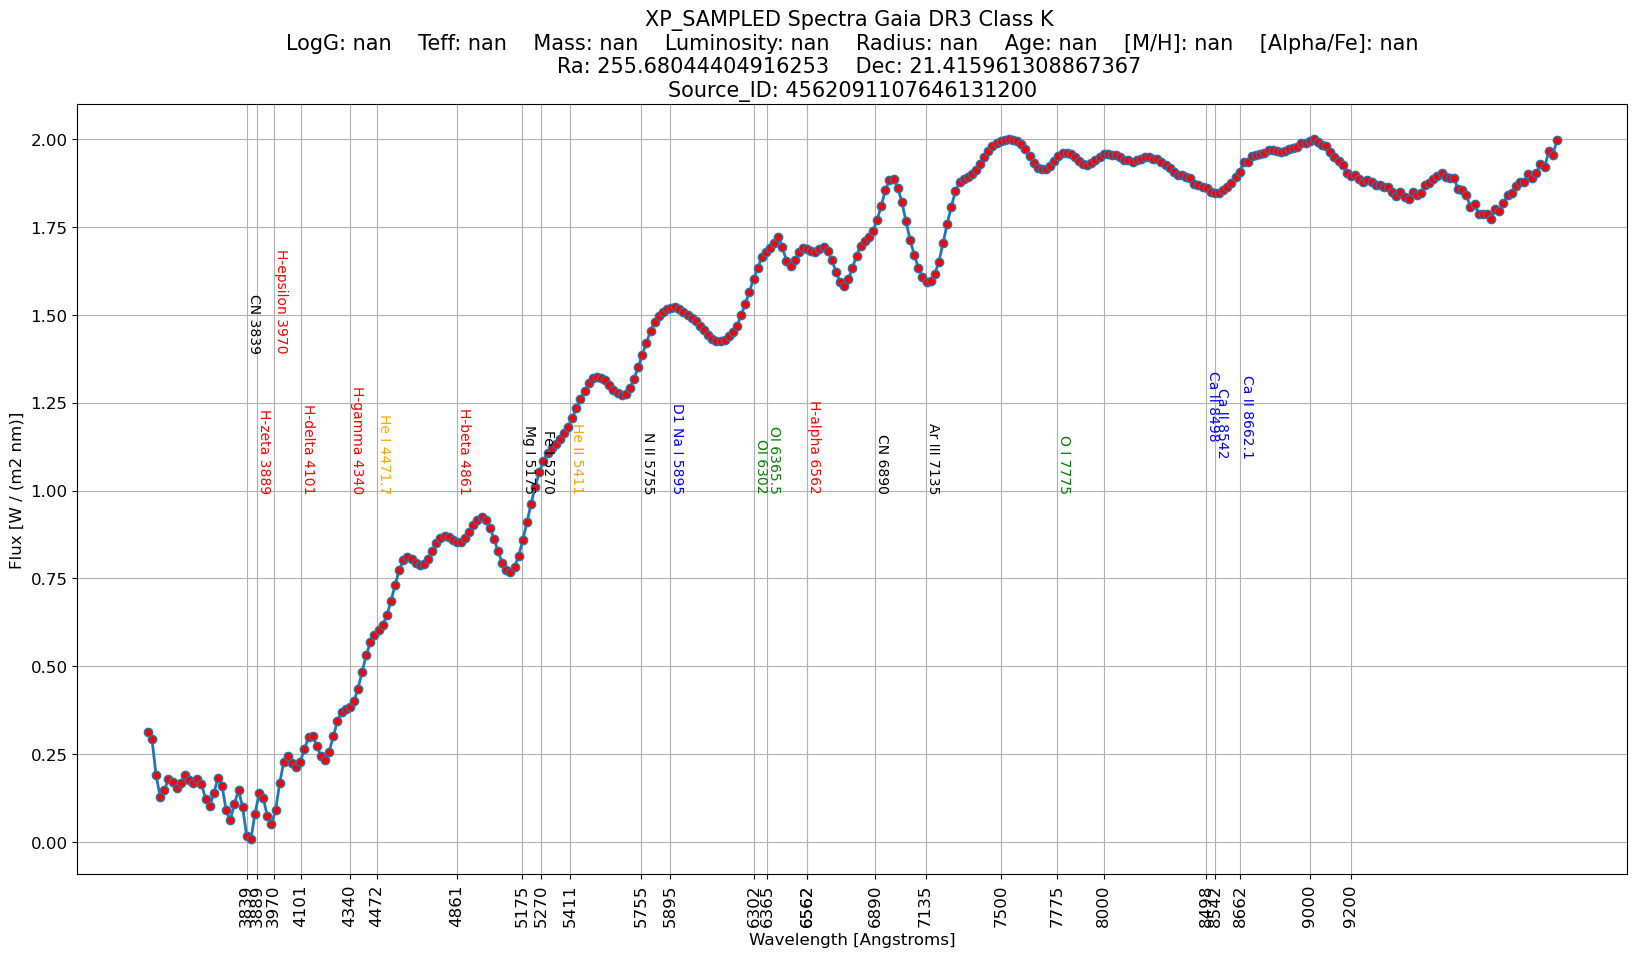


asassn_name: [['ASASSN-V J170243.31+212457.6']]
asas_sn_id: 0    180389157278
Name: asas_sn_id, dtype: int64
Pulled 1 of 1


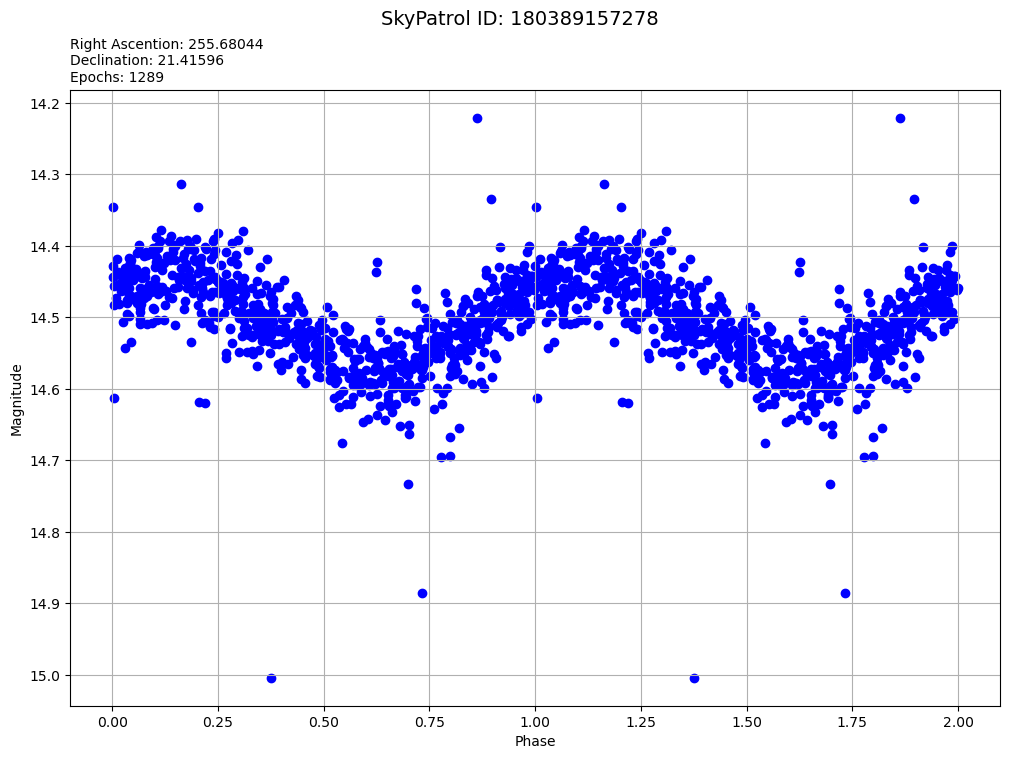


4562091107646131200 has_rvs: False


Done!


In [90]:
plt.close('all')

for idx in range(0, len(results)):
    print("\n1: " + str(results[idx]) + ' has_xp_sampled: ' + str(target['has_xp_sampled'].iloc[idx]))                        # 1st print statement
    if target['has_xp_sampled'].iloc[idx] == True:
        datalink = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'XP_SAMPLED')
        outputs = [datalink[key][0] for key in datalink.keys()]

        #print("2: " + str(results[idx]) + " Number of stars with XP Spectra: " + str(len(outputs)))                         # 2nd print statement
        if outputs is not None:
            #print("3: " + "outputs is not None")                                                                            # 3rd print statement
            if len(outputs) > 0:
                #print("4: " + "len(outputs): " + str(len(outputs)))                                                         # 4th print statement

                # ====================================================================================
                xRa = str(target['ra'].iloc[idx])
                yDec = str(target['dec'].iloc[idx])
                source_id = str(target['source_id'].iloc[idx])

                print("\n" + "Ra: " + str(xRa))                                                                            
                print("Dec: " + str(yDec))  
                print("\n" + "Source_Id: " + str(source_id) + "\n")          

                if lamost_LRS_portal_flag == 'Y':
                    lamost_portal = 'https://dr7.lamost.org/spectrum/view?obsid=' + str(lamost_LRS_obsid)
                    webbrowser.open(lamost_portal)     

                if lamost_MRS_portal_flag == 'Y':
                    lamost_MRS_portal = 'https://dr7.lamost.org/v2.0/medspectrum/view?obsid=' + str(lamost_MRS_obsid)
                    webbrowser.open(lamost_MRS_portal)

                if cds_portal_flag == 'Y':
                    cds_portal = 'http://cdsportal.u-strasbg.fr/?target=' + str(xRa) + '%20' + str(yDec)
                    webbrowser.open(cds_portal) 

                if simbad_portal_flag == 'Y':
                    simbad_portal = 'http://simbad.cds.unistra.fr/simbad/sim-coo?Coord=' + str(xRa) + '+' + str(yDec) + \
                                '&CooFrame=FK5&CooEpoch=2000&CooEqui=2000&CooDefinedFrames=none&Radius=2&Radius.unit=arcmin&submit=submit+query'
                    webbrowser.open(simbad_portal)  

                if sdss_portal_flag == 'Y':
                    sdss_portal = 'http://skyserver.sdss.org/dr17/VisualTools/quickobj?ra=' + str(xRa) + '&dec=' + str(yDec)
                    webbrowser.open(sdss_portal)           

                if vizier_portal_flag == 'Y':
                    vizier_portal = 'http://vizier.u-strasbg.fr/viz-bin/VizieR-S?Gaia%20EDR3%20' + str(source_id) 
                    webbrowser.open(vizier_portal)                                          

                result_table = Simbad.query_region(coord.SkyCoord(str(xRa) + " " + str(yDec), 
                    unit=(u.deg, u.deg),frame='icrs'))

                #print("5: " + str(result_table))                                                                            # 5th print statement
                if result_table is not None:
                    if len(result_table) > 0:
                        #print("6: " + "Ra: " + str(xRa))                                                                     # 6th print statement
                        #print("7: " + "Dec: " + str(yDec))                                                                   # 7th print statement

                        for i in range(0, len(result_table['MAIN_ID'])):
                            if i < 2:
                                print(result_table['MAIN_ID'][i])

                        target1 = result_table['MAIN_ID'][0]

                        object = Simbad.query_object(target1)

                        tap_service = vo.dal.TAPService("http://simbad.u-strasbg.fr/simbad/sim-tap")

                        tap_sql = "SELECT main_id, sp_type, otype_txt, otype_longname \
                                        FROM basic JOIN ident ON oidref = oid \
                                            JOIN otypedef ON basic.otype = otypedef.otype \
                                        WHERE id = '" + str(target1) + "';"

                        tap_results = tap_service.search(tap_sql)
                        sptype = tap_results['sp_type']
                        txt = str(sptype).split("=")
                        txt = str(txt).replace("['", "")
                        sp_txt = str(txt).replace("']", "")
                        print("\n" + "Simbad star subclass: " + str(sp_txt))
                else:
                    print("\nNo Simbad match found!")


                print("\n" + "BP_RP star subclass: " + str(target['SpT2'].iloc[idx]))
                print("BP_RP dereddened star subclass: " + str(target['SpT2_dereddened'].iloc[idx]))
                print("classlabel_espels: " + str(target['classlabel_espels'].iloc[idx]))
                print("Star Type: " + str(target['Star_Type'].iloc[idx]))
                if asas_sn_flag == 'Y':
                    print('\nasassn_name: ' + str(df_variable[['asassn_name']].values))
                    print('other_names: ' + str(df_variable[['other_names']].values))
                    print("\nASAS_SN Variable Type: " + str(ASASSN_Variable_Type) + '\n' )
                    asassval = df_variable['asassn_name'].values[0]
                    asassval = asassval.replace(" ", "%20")
                    asassval = asassval.replace("+", "%2B")
                    webbrowser.open('https://asas-sn.osu.edu/variables?&name=' + str(asassval))
                if lamost_LRS_portal_flag == 'Y':
                    print("\nlamost_LRS_designation: "  + str(lamost_LRS_designation))
                    print("lamost_LRS_obsid: "  + str(lamost_LRS_obsid))
                    #print("lamost_LRS_gaia_source_id: "  + str(lamost_LRS_source_id))
                    print("lamost_LRS_subclass: " + str(lamost_LRS_subclass) + '\n' )
                if lamost_MRS_portal_flag == 'Y':
                    print("lamost_MRS_designation: "  + str(lamost_MRS_designation))
                    print("lamost_MRS_obsid: "  + str(lamost_MRS_obsid))
                    #print("lamost_MRS_gaia_source_id: "  + str(lamost_MRS_source_id))
                    print("lamost_MRS_mobsid: " + str(lamost_MRS_mobsid) + '\n' )
                
                #print("Star Distance [pc]: " + str(int(target['distance_gspphot'].iloc[idx])))
                #print("Star Distance [light years]: " + str(int(target['distance_gspphot'].iloc[idx] * 3.26156)) + "\n")

                # ====================================================================================


                xp      = outputs[0].to_table()                       

                # Add flux-density columns ============================
                xp['flux_jy']         = xp['flux'].to(u.Jansky, equivalencies = u.spectral_density(xp['wavelength'].value * xp['wavelength'].unit))
                xp['flux_mjy']        = xp['flux_jy'].to(u.millijansky)
                xp['flux_mjy'].format = '7.4f'
                
                # =========
                
                #display(xp)

                # =========

                fig       = plt.figure(figsize=[20,10])

                yRangeMax = float(xp['flux'].max())

                plt.plot(xp['wavelength']*10, xp['flux']/yRangeMax * 2, linewidth = 2, marker='o', markerfacecolor='red') 
                plt.title('XP_SAMPLED Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                ' \nLogG: ' + str(round(target['logg_gspphot'].iloc[idx], 2)) + 
                '    Teff: ' + str(round(target['teff_gspphot'].iloc[idx],0)) +
                '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                '    [M/H]: ' + str(round(target['mh_gspphot'].iloc[idx],2)) +
                '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                if make_canvas_flag == "Y":
                    make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", 
                                fontsize = 12)
                #else:
                    #make_labels()

                if hydrogen_lines_flag == "Y":
                    Hydrogen_lines(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", 
                                   fontsize = 12)

                plt.show()
                
                if asas_sn_plot_flag == 'Y':
                    gaia_id = int(target['source_id'].iloc[idx])
                    df_asas = client.query_list([gaia_id],
                        catalog='stellar_main',id_col='gaia_id')
                    asas_sn_id = df_asas['asas_sn_id']
                    
                    if asas_sn_id.empty:
                        print("No asas_sn_id")
                    else:
                        print('\nasassn_name: ' + str(df_variable[['asassn_name']].values))
                        print("asas_sn_id: " + str(asas_sn_id))
                        asas_sn_id = int(df_asas['asas_sn_id'])
                        lcs = client.query_list([asas_sn_id],
                            catalog='master_list',id_col='asas_sn_id',download=True)
                        lightcurve = lcs[asas_sn_id]
                        #lightcurve.plot()
                    
                        """
                        Periodigram Utility
                        We have included a thin-wrapper for astropy’s lomb scargle periodagram utility. 
                        Using the lomb_scargle function we can get the freqency and power spectrum of the light curve. 
                        While ‘plot’ is set to True, the function will also produce a plot of the power spectrum
                        """;

                        # An astropy LombScargle object is also returned as ls
                        frequency, power, ls = lightcurve.lomb_scargle(plot=False)

                        """
                        Finally, we can use the power spectrum to find the period of our target and generate a 
                        phase folded lightcurve.
                        """;

                        # If plot is set we will also get a plot.
                        lightcurve.find_period(frequency, power, plot=True)

                        
                    

        print("\n" + str(results[idx]) + ' has_rvs: ' + str(target['has_rvs'].iloc[idx]) + "\n")
        if target['has_rvs'].iloc[idx] == True:
            datalinkRVS = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'RVS')
            outputsRVS = [datalinkRVS[key][0] for key in datalinkRVS.keys()]
            #print("datalinkRVS: " + str(datalinkRVS))

            if outputsRVS is not None:
                if len(outputsRVS) >0:
                    xpRVS      = outputsRVS[0].to_table()

                    # =========
                
                    #display(xpRVS)

                    # =========

                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas()
                        
                    plt.show()


                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    plt.xlim(8460, 8580)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas1()
                        
                    plt.show()


                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    plt.xlim(8580, 8700)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas2()
                        
                    plt.show()


        #print(str(results[idx]) + ' has_xp_continuous: ' + str(target['has_xp_continuouss'].iloc[idx]))
        if target['has_xp_continuous'].iloc[idx] == True:
            datalinkXPC = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'XP_CONTINUOUS')
            outputsXPC = [datalinkXPC[key][0] for key in datalinkXPC.keys()]
            #print("datalinkXPC: " + str(datalinkXPC))

           

print("\nDone!")

<img width="800" src="screen_shot_1.png">

<img width="800" src="screen_shot_2.png">

In [90]:
df = df_variable

In [91]:
#df.columns.sort_values()

In [92]:
df.head(2)

,source_id,asassn_name,other_names,raj2000,dej2000,l,b,mean_vmag,amplitude,period,variable_type,class_probability,lksl_statistic,rfr_score,epoch_hjd,gdr2_id,phot_g_mean_mag,e_phot_g_mean_mag,phot_bp_mean_mag,e_phot_bp_mean_mag,phot_rp_mean_mag,e_phot_rp_mean_mag,bp_rp,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,vt,dist,allwise_id,j_mag,e_j_mag,h_mag,e_h_mag,k_mag,e_k_mag,w1_mag,e_w1_mag,w2_mag,e_w2_mag,w3_mag,e_w3_mag,w4_mag,e_w4_mag,j_k,w1_w2,w3_w4,apass_dr9_id,apass_vmag,e_apass_vmag,apass_bmag,e_apass_bmag,apass_gpmag,e_apass_gpmag,apass_rpmag,e_apass_rpmag,apass_ipmag,e_apass_ipmag,b_v,e_b_v,vector_x,vector_y,vector_z,reference,periodic,classified,asassn_discovery,edr3_source_id,galex_id,FUVmag,e_FUVmag,NUVmag,e_NUVmag,tic_id,pm,ruwe,gaia_source_id,AbsoluteMagnitude
1594,63380,ASASSN-V J195058.20+475331.6,T-Cyg1-16956,297.74248,47.8921,81.67642,10.66175,13.97,0.16,1.072937,EA,1.0,0.35,0.82,2.456829e+06,2.086508e+18,13.978276,0.00318,14.207256,0.008415,13.540376,0.009855,0.666881,0.497,0.0121,41.2062,-3.939,0.014,-9.855,0.015,26.30889,1912.12317,J195058.18+475329.9,12.939,0.022,12.733,0.021,12.666,0.027,12.644,0.024,12.662,0.023,12.443,NaN,9.482,NaN,0.273,-0.018,2.961,14326334.0,13.937,0.042,14.415,0.247,14.057,0.176,13.805,0.137,13.679,0.129,0.478,0.14,0.31213,-0.593451,0.741883,The ASAS-SN Catalog of Variable Stars: II,True,True,False,EDR3 2086508169098070016,NaN,NaN,NaN,NaN,NaN,TIC 273376026,10.613,0.985,2086508169098070016,2.460058


In [93]:
df[['asassn_name', 'variable_type', 'amplitude', 'period', 'edr3_source_id', 'dist', 'parallax', 'tic_id', 'allwise_id', 'galex_id' ]]


,asassn_name,variable_type,amplitude,period,edr3_source_id,dist,parallax,tic_id,allwise_id,galex_id
1594,ASASSN-V J195058.20+475331.6,EA,0.16,1.072937,EDR3 2086508169098070016,1912.12317,0.497,TIC 273376026,J195058.18+475329.9,NaN


In [94]:
target1 = df['tic_id'].values[0]
target1

'TIC 273376026'

In [95]:
target_period = df['period'].values[0]
target_period

1.0729369

In [96]:
search_result = lk.search_lightcurve(target1)

print(search_result)
print("\n")


SearchResult containing 4 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 14 2019  TASOC    1800   273376026      0.0
  1 TESS Sector 14 2019  TASOC    1800   273376026      0.0
  2 TESS Sector 15 2019  TASOC    1800   273376026      0.0
  3 TESS Sector 15 2019  TASOC    1800   273376026      0.0




In [97]:
TIC = df['tic_id'].values[0]

print(TIC)

TIC 273376026


In [98]:
plot_pixelfile       = "N"
plot_lightcurve      = "Y"
plot_period          = "Y"
plot_phase_fold      = "Y"
plot_half_phase_fold = "NN"
plot_2phase_fold     = "NN"
plot_3phase_fold     = "NN"
plot_4phase_fold     = "Y"
plot_PDC_AP_Flux     = "NN"
plot_periodogram     = "Y" # Large output

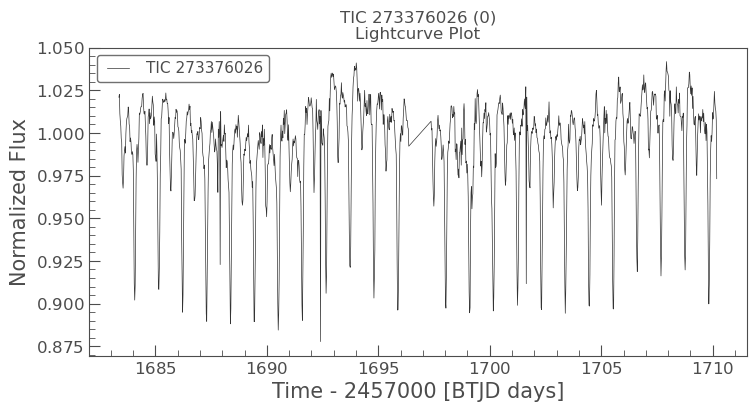

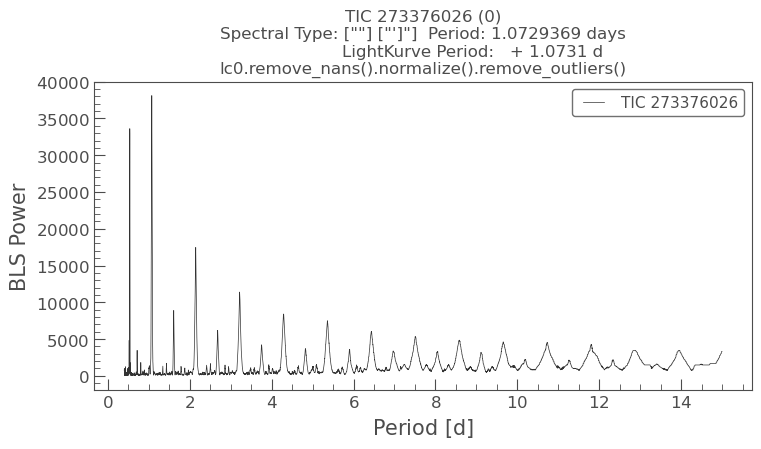

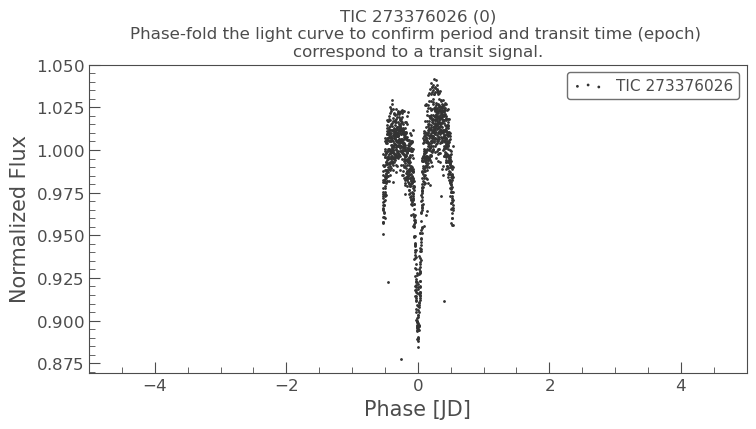

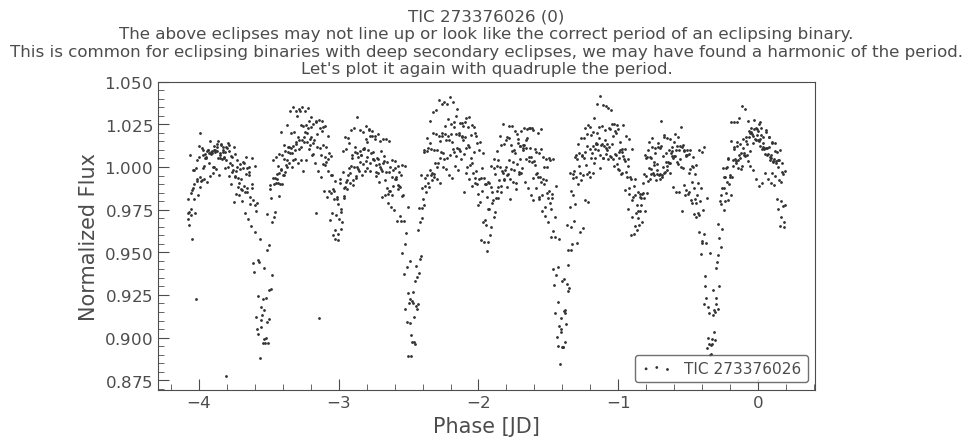

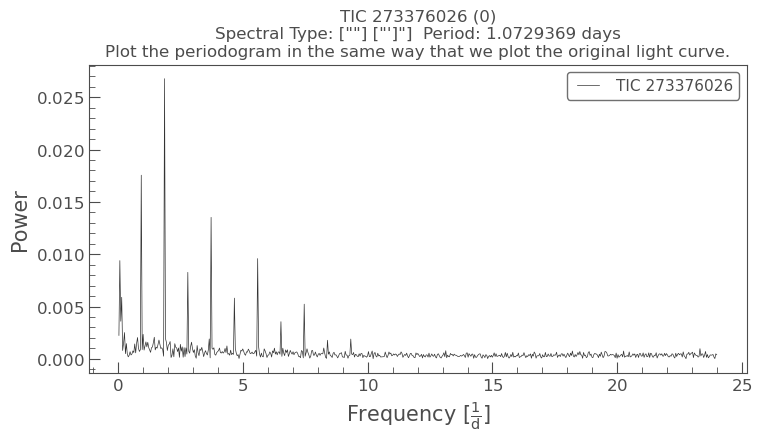

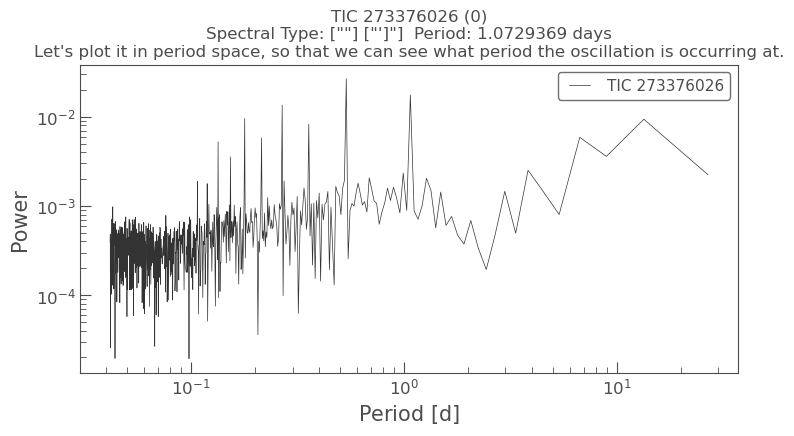

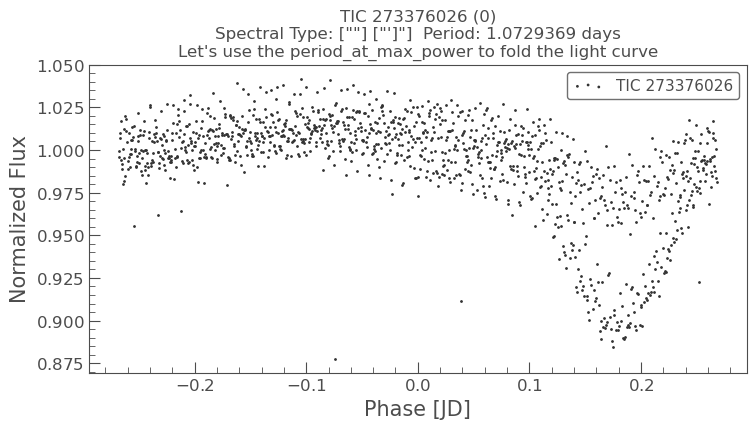

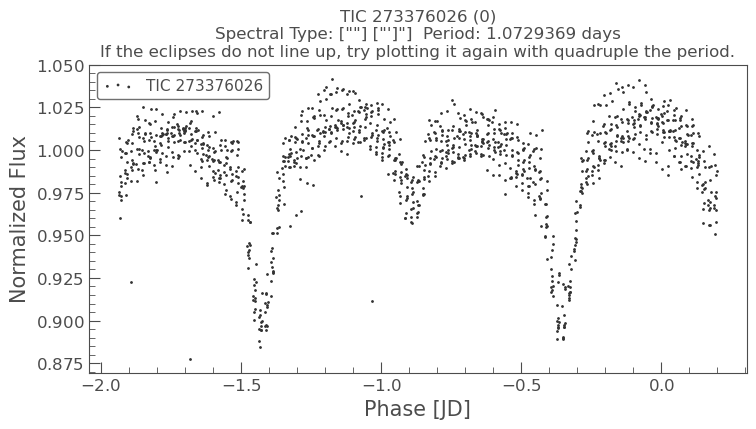

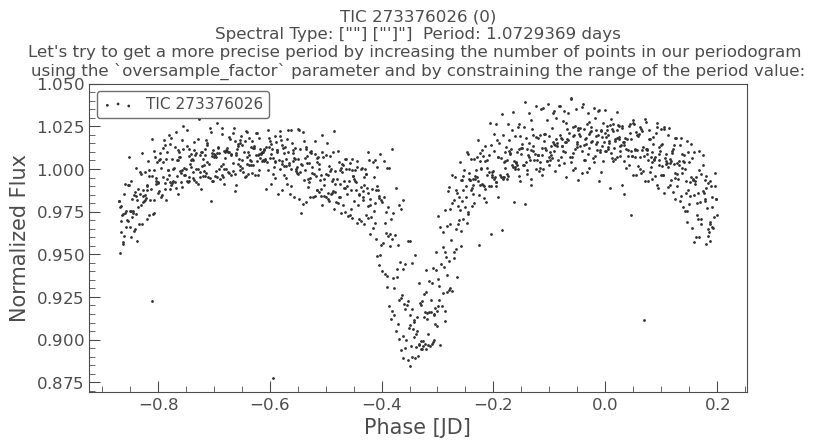

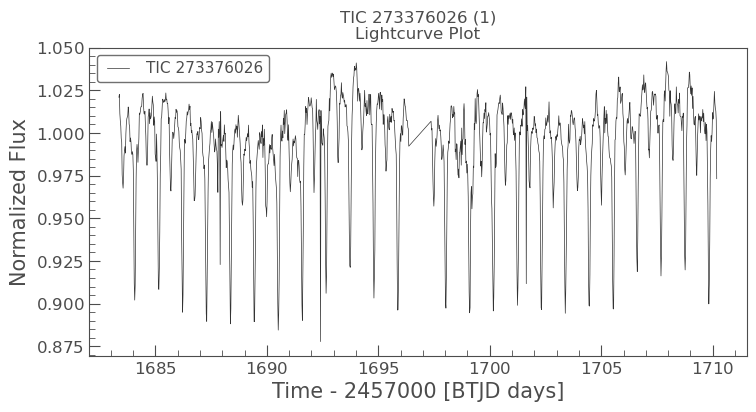

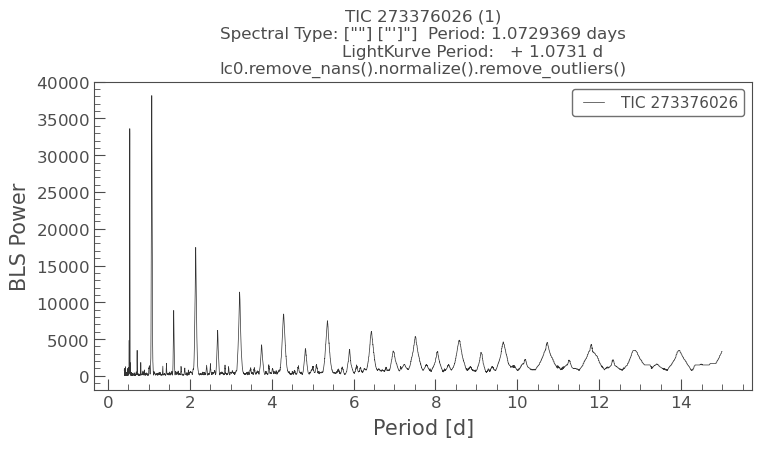

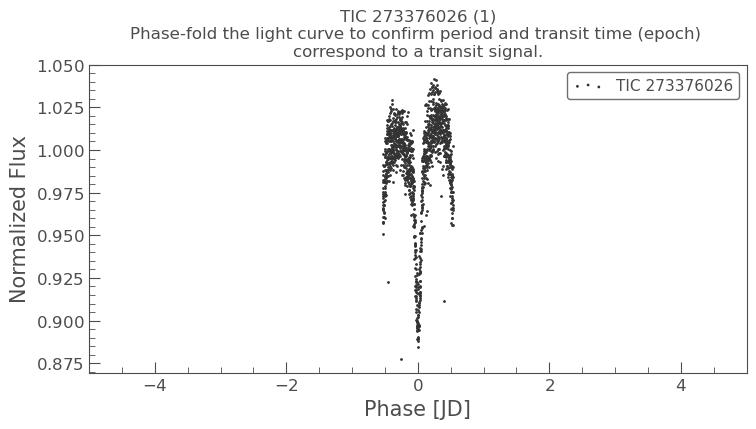

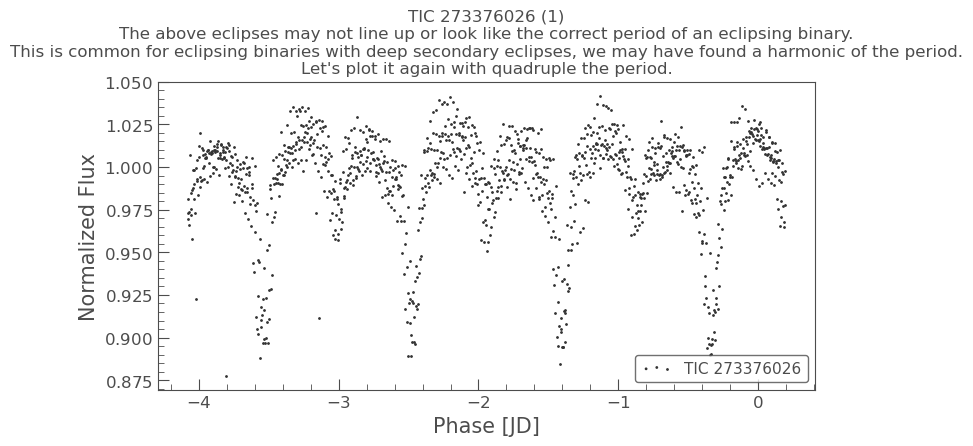

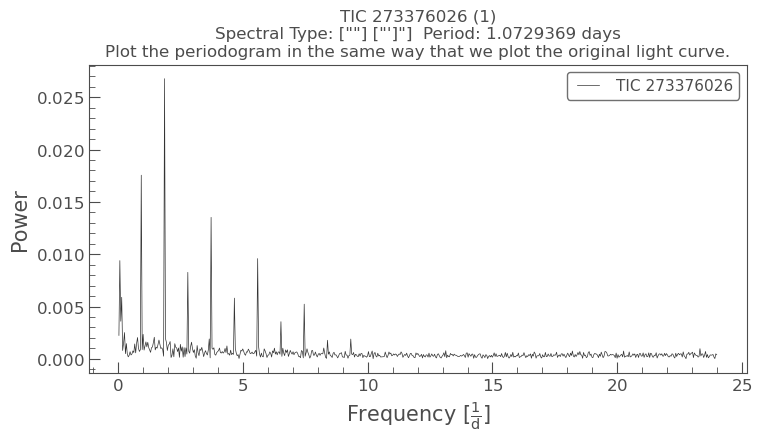

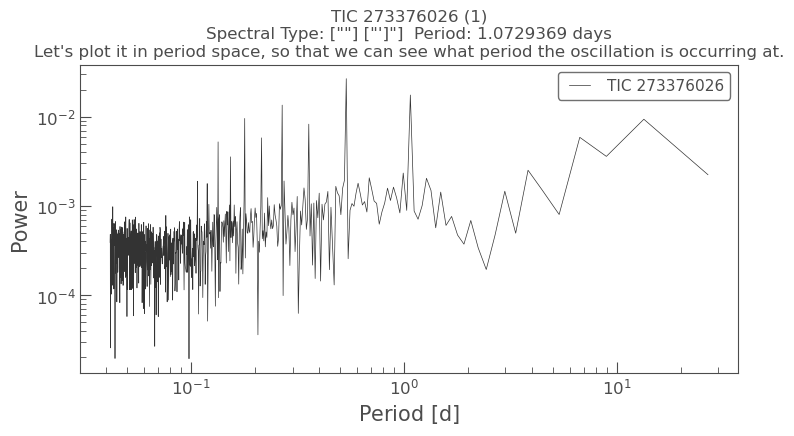

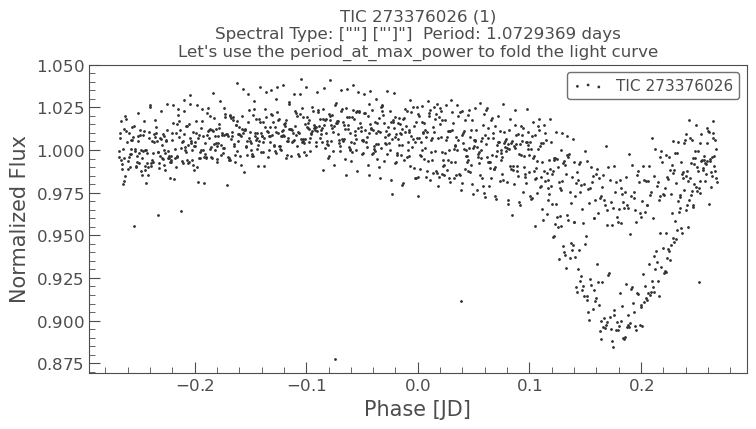

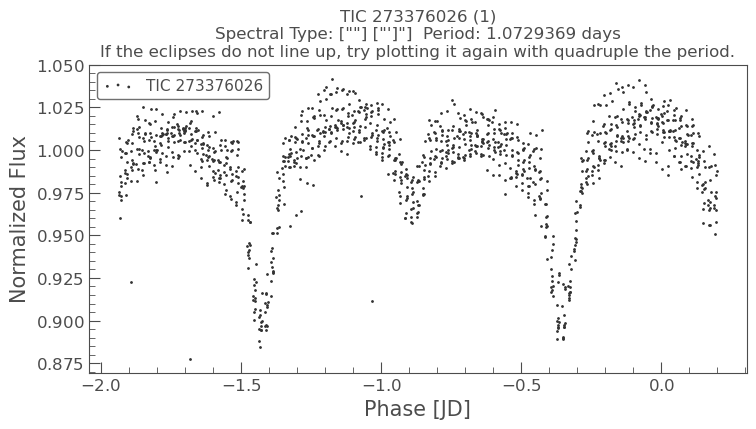

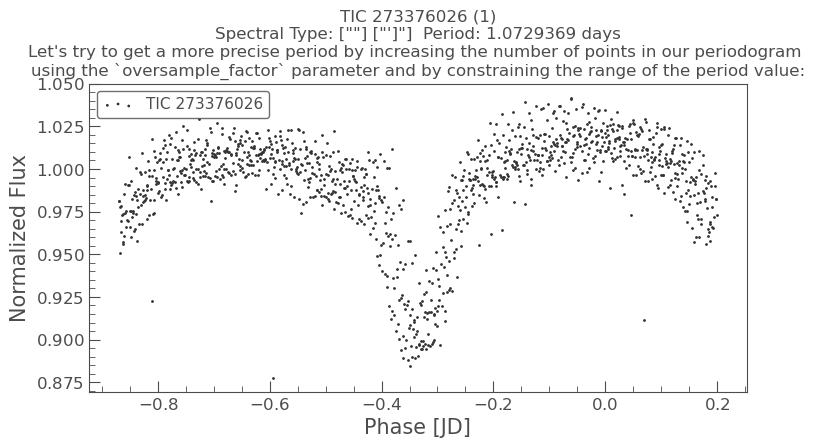


Done!


In [99]:
# Change range to fit requirement

for i in range(0, 2):
     if i <= len(search_result) -1:
          if search_result[i].author != 'K2SC':
               #if search_result[i].author != 'K2SFF':
                    if search_result[i].author != 'K2VARCAT':
                         if search_result[i].author != 'DIAMANTE':
                              #if search_result[i].author != 'QLP':
                                   if search_result[i].author != 'CDIPS':
                                        #if search_result[i].author != 'TASOC':
                                             freqmin = 0.4
                                             freqmax = 15
                                             #Target_Name = '\n[Kepler-8 b]  Period: 3.52 days'
                                             #Target_Name = '\nRA: ' + str(RA) + '  ' + 'DEC: ' + str(DEC)  + '\n' + str(txt)  + '  Period: 3.90 days'
                                             Target_Name =  '\nSpectral Type: ' + str(sp_txt) + ' ' + str(txt)  + '  Period: ' + str(target_period) + ' days'
                                             #Target_Name = '\n' + "[TOI-125 d]"  + '  NASA Reported Period: 19.98  days'
                                             #PlotTarget4(target1, i, Target_Name, freqmin, freqmax)
                                             PlotTarget4B(target1, i, Target_Name, freqmin, freqmax)
                                             #PlotTarget5(target1, i, Target_Name, freqmin, freqmax)  # KeyError: "Keyword 'FRAMETIM' not found."

print("\nDone!")

In [26]:
import webbrowser

webbrowser.open('https://arxiv.org/pdf/1803.01001.pdf') # The ASAS-SN Catalog of Variable Stars I: The Serendipitous Survey

True

In [4]:
import webbrowser

webbrowser.open('https://arxiv.org/pdf/1809.07329.pdf') # The ASAS-SN Catalog of Variable Stars II: Uniform Classification of 412,000 Known Variables

True

In [53]:
import webbrowser

webbrowser.open('https://arxiv.org/pdf/1901.00009.pdf') # The ASAS-SN Catalog of Variable Stars III: Variables in the Southern TESS Continuous Viewing Zone

True

In [52]:
import webbrowser

webbrowser.open('https://arxiv.org/pdf/1907.10609.pdf') # The ASAS-SN Catalog of Variable Stars V: Variables in the Southern Hemisphere

True

In [51]:
import webbrowser

webbrowser.open('https://arxiv.org/pdf/2006.10057.pdf') # The ASAS-SN Catalog of Variable Stars IX: The Spectroscopic Properties of Galactic Variable Stars

True

In [50]:
import webbrowser

webbrowser.open('https://arxiv.org/pdf/2205.02239.pdf') # The ASAS-SN Catalog of Variable Stars X: Discovery of 116,000 New Variable Stars Using g-band Photometry

True

In [2]:
from pyasassn.client import SkyPatrolClient
client = SkyPatrolClient()

Welcome to ASAS-SN Skypatrol!

Current Deployment Version: 0.6.9 (28 April 2023)
Please upgrade your client if not up to date.



In [33]:
query = """
SELECT c2.name, c1.ra_deg, c1.dec_deg, c1.asas_sn_id, c1.gaia_id, c1.tic_id, c2.variability_type,  c2.period
FROM stellar_main AS c1
JOIN aavsovsx AS c2 USING(asas_sn_id)
WHERE variability_type = 'YSO'
"""

#client.adql_query(query)

results = client.adql_query(query)


print(str(len(results)))
#results


# variability_type = 'CV'
# variability_type = 'CV:'
# variability_type = 'CV+E'
# variability_type = 'EA'
# variability_type = 'EB'
# variability_type = 'EW'
# variability_type = 'L'
# variability_type = 'M'
# variability_type = 'RRAB'
# variability_type = 'RRC'
# variability_type = 'SR'
# variability_type = 'WR'
# variability_type = 'YSO'



2868


In [34]:
results.to_csv('asas_sn_yso_variables_' + str(len(results)) + '.csv')

